# ML Course 2024 |  Medical Expenses Prediction Challenge



# Imports

[Colab only] Note: if you need to install any packages, run a code cell with content `!pip install packagename`

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In a first step, we load the provided training data from the csv file

In [ ]:
df_train = pd.read_csv('/content/train.csv')
print("The loaded dataset has {} rows and {} columns".format(df_train.shape[0], df_train.shape[1]))

The loaded dataset has 15000 rows and 110 columns


In [ ]:
df_train.head()

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0  Non-White    1     19   7205.036720            -1               2   
1      White    1     20   5501.113581            -1               4   
2      White    1     20  16797.708379            -1               4   
3  Non-White    2     19   3605.218411            -1               2   
4  Non-White    1     19  11223.127404             1               2   

   HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0              2            2            2             2  ...   
1              2            1            1             2  ...   
2              1            3            1             2  ...   
3              2            3            3             2  ...   
4              2            1            2             2  ...   

   NUM_PRESCR_MEDS  DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  \
0                0            2           2     2            1   
1               12            2           2     2            0   
2               20            2           2     2            0   
3               20            2           2     2            0   
4                3            2           2     2            0   

   MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  
0            43.82         61.41            3            0          LOW  
1            60.12         54.80            0          240          LOW  
2            60.35         30.08            0          791          LOW  
3            58.32         50.22            0          272          LOW  
4            62.39         56.71            0         1264          LOW  

[5 rows x 110 columns]

# Data exploration

In [ ]:
print("Number of Features:", len(list(df_train.columns)))

demographics_col = ["RACE", "SEX", "AGE", "PANEL", "REGION", "MARITAL_STAT",
                    "POVRTY_CAT", "POVRTY_LEV", "EDU_YRS","EDU_DEG", "SPOUSE_PRSNT",
                    "STUDENT_STAT", "UNION_STAT", "NUM_DEP_OUT_REP_UNT" , "EMPLYMT",
                    "OCCUP", "NON_ENG_LANG"]

personal_col = ["PUB_ASST", "TAX_FORM_TYP", "FOOD_STMP_MNTHS", "FOOD_STMP_VAL",
                "MIL_ACTIV_DUTY", "HON_DISCHARGE", "INSUR_COV", "TOT_INCOME",
                "EMPLYR_INS", "CHILD_SUPP", "PROB_WKIDS", "FAM_INCOME", "PROB_BILL_PAY",
                "DELAY_PRESCR_MED", "DAYS_CAREOTHR_NOWORK", "PENSN_PLAN", "NO_WORK_WHY"]

health_related_col = ["WEIGHT", "HEALTH_STAT", "MENTAL_HLTH", "CHRON_BRONCH", "JNT_PAIN",
                      "PREGNT", "WALK_LIM", "ACTIV_LIM", "SOCIAL_LIM", "COGNTV_LIM",
                      "BM_IDX", "MULT_HIGHBP", "HOUSEWRK_LIM", "SCHOOL_LIM", "ADV_NO_FAT_FOOD",
                      "ADV_EXERCISE_MORE", "ADV_DNTL_CKP", "FREQ_DNTL_CKP", "RSN_NO_DNTL_CKP",
                      "RSN_NO_MED_CKP", "DOC_CK_BP", "TAKE_RISK", "ADV_BOOST_SEAT",
                      "WHEN_ADV_BOOST_SEAT", "FEEL_DEPRS", "ADV_NO_SMKG", "AGE_DIAG_ADHD",
                      "PROB_WBHV", "WEAR_SEATBLT", "WHEN_ADV_LAP_BLT", "WHEN_LST_ASTHMA",
                      "ADV_LAP_BLT", "ADV_EAT_HLTHY", "DOC_TIM_ALN", "APPT_REG_MEDCARE",
                      "LOST_ALL_TEETH", "ASPRN_REG", "DIFF_ERRND_ALN", "DIAB_KIDNY", "DIAB_INSLN",
                      "DIAB_MED", "DISPSN_STAT", "TIME_LAST_PSA", "WHEN_ADV_EXERCISE", "DEAF",
                      "BLIND", "LAST_FLU_VAC", "UNABL_PRES_MED", "HEAR_AID", "LAST_REG_CKP",
                      "DAYS_ILL_NOWORK", "DAYS_ILL_NOSCHL", "HIGH_BP_DIAG", "COR_HRT_DIAG",
                      "ANGINA_DIAG", "HRT_ATT_DIAG", "OTH_HRT_DIAG", "STROKE_DIAG", "EMPHYM_DIAG",
                      "HIGHCHOL_DIAG", "CANCER_DIAG", "DIAB_DIAG", "ARTHR_DIAG", "ARTHR_TYPE",
                      "ASTHM_DIAG", "ADHD_DIAG", "NUM_PRESCR_MEDS", "DIFFIC_HEAR", "DIFFIC_SEE",
                      "SMOK", "OVR_FEEL_14", "MENTAL_HLTH_SCR", "PHY_HLTH_SCR", "OVR_FEEL_30"]

print(len(demographics_col) + len(personal_col) + len(health_related_col))

Number of Features: 110
108


In [ ]:

len(set(df_train.columns).intersection(set(demographics_col + personal_col + health_related_col)))

108

In [ ]:
set(df_train.columns).difference(set(demographics_col + personal_col + health_related_col))

{'TOT_MED_EXP', 'UTILIZATION'}

In [ ]:
set(set(demographics_col + personal_col + health_related_col)).difference(df_train.columns)

set()

In [ ]:
df_train.dtypes

RACE                object
SEX                  int64
PANEL                int64
WEIGHT             float64
STUDENT_STAT         int64
                    ...   
MENTAL_HLTH_SCR    float64
PHY_HLTH_SCR       float64
OVR_FEEL_30          int64
TOT_MED_EXP          int64
UTILIZATION         object
Length: 110, dtype: object

In [ ]:
print("Dataset size:", df_train.shape)
df_train.info()

Dataset size: (15000, 110)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 110 entries, RACE to UTILIZATION
dtypes: float64(7), int64(101), object(2)
memory usage: 12.6+ MB


In [ ]:
## define all the columns which are categorical and numerical columns
num_cols = ["WEIGHT", "AGE", "TOT_INCOME", "BM_IDX", "CHILD_SUPP", "PUB_ASST", "FOOD_STMP_VAL", "EDU_YRS",
            "FAM_INCOME", "POVRTY_LEV", "DAYS_ILL_NOWORK", "DAYS_ILL_NOSCHL", "NUM_PRESCR_MEDS",
            "MENTAL_HLTH_SCR", "PHY_HLTH_SCR", "OVR_FEEL_30"]

cat_cols = list(set(demographics_col + personal_col + health_related_col) - set(num_cols))

##Data Cleaning and Analysis


In [ ]:
df_train.isnull().values.any()

False

In [ ]:
df_train["TOT_MED_EXP"].describe()

count     15000.000000
mean       4931.666933
std       12802.592340
min           0.000000
25%         104.000000
50%         911.000000
75%        4015.500000
max      236449.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[df_train["RACE"] == "White"]["TOT_MED_EXP"].describe()

count      6246.000000
mean       6296.404579
std       14358.021634
min           0.000000
25%         380.250000
50%        1772.500000
75%        5832.000000
max      236449.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[df_train["RACE"] == "Non-White"]["TOT_MED_EXP"].describe()

count      8754.000000
mean       3957.923349
std       11467.616131
min           0.000000
25%           0.000000
50%         499.500000
75%        2632.500000
max      214830.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[df_train["SEX"] == 1]["TOT_MED_EXP"].describe()

count      7010.000000
mean       4099.754494
std       11976.908326
min           0.000000
25%           0.000000
50%         521.500000
75%        2761.250000
max      228348.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[df_train["SEX"] == 2]["TOT_MED_EXP"].describe()

count      7990.000000
mean       5661.542553
std       13443.848609
min           0.000000
25%         244.000000
50%        1364.000000
75%        5097.500000
max      236449.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[(df_train["RACE"] == "Non-White") & (df_train["SEX"] == 1)]["TOT_MED_EXP"].describe()

count      3997.000000
mean       2999.300225
std       10020.071769
min           0.000000
25%           0.000000
50%         250.000000
75%        1530.000000
max      187201.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[(df_train["RACE"] == "Non-White") & (df_train["SEX"] == 2)]["TOT_MED_EXP"].describe()

count      4757.000000
mean       4763.392474
std       12499.864343
min           0.000000
25%         114.000000
50%         855.000000
75%        3681.000000
max      214830.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[(df_train["RACE"] == "White") & (df_train["SEX"] == 2)]["TOT_MED_EXP"].describe()

count      3233.000000
mean       6983.070523
std       14625.227117
min           0.000000
25%         655.000000
50%        2384.000000
75%        7210.000000
max      236449.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
df_train[(df_train["RACE"] == "White") & (df_train["SEX"] == 1)]["TOT_MED_EXP"].describe()

count      3013.000000
mean       5559.600398
std       14030.748842
min           0.000000
25%         204.000000
50%        1221.000000
75%        4614.000000
max      228348.000000
Name: TOT_MED_EXP, dtype: float64

In [ ]:
import numpy as np
df_train_clnan = df_train.replace(-9, np.nan)
df_train_clnan = df_train_clnan.replace(-8, np.nan)
df_train_clnan = df_train_clnan.replace(-7, np.nan)
# df_train_clnan = df_train_clnan.dropna(how='all', axis=0)
# df_train_clnan = df_train_clnan.replace(np.nan, 0)

In [ ]:
df_train_cl = df_train.loc[~(df_train==-7).any(axis=1)]
df_train_cl = df_train_cl.loc[~(df_train==-8).any(axis=1)]
df_train_cl = df_train_cl.loc[~(df_train==-9).any(axis=1)]

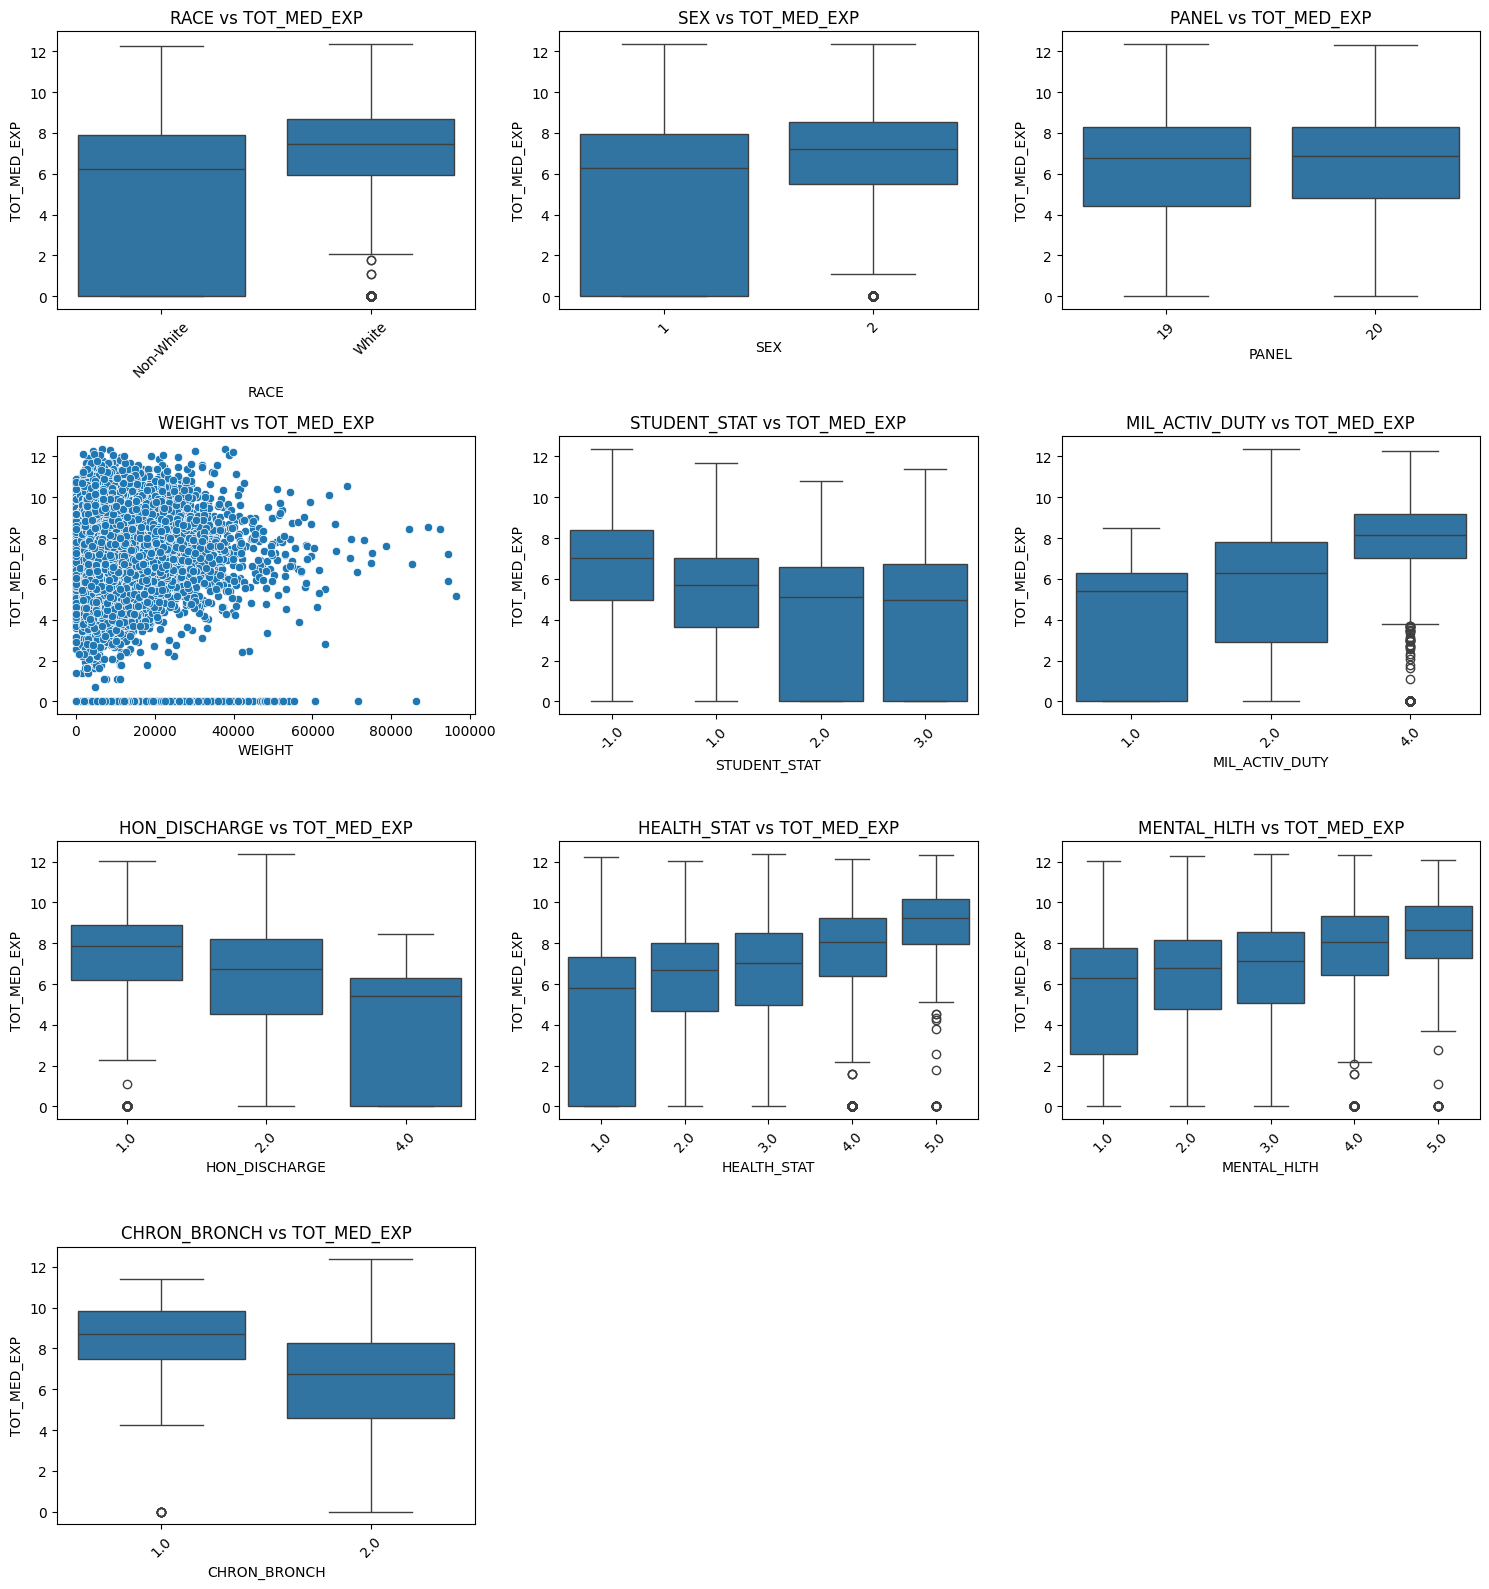

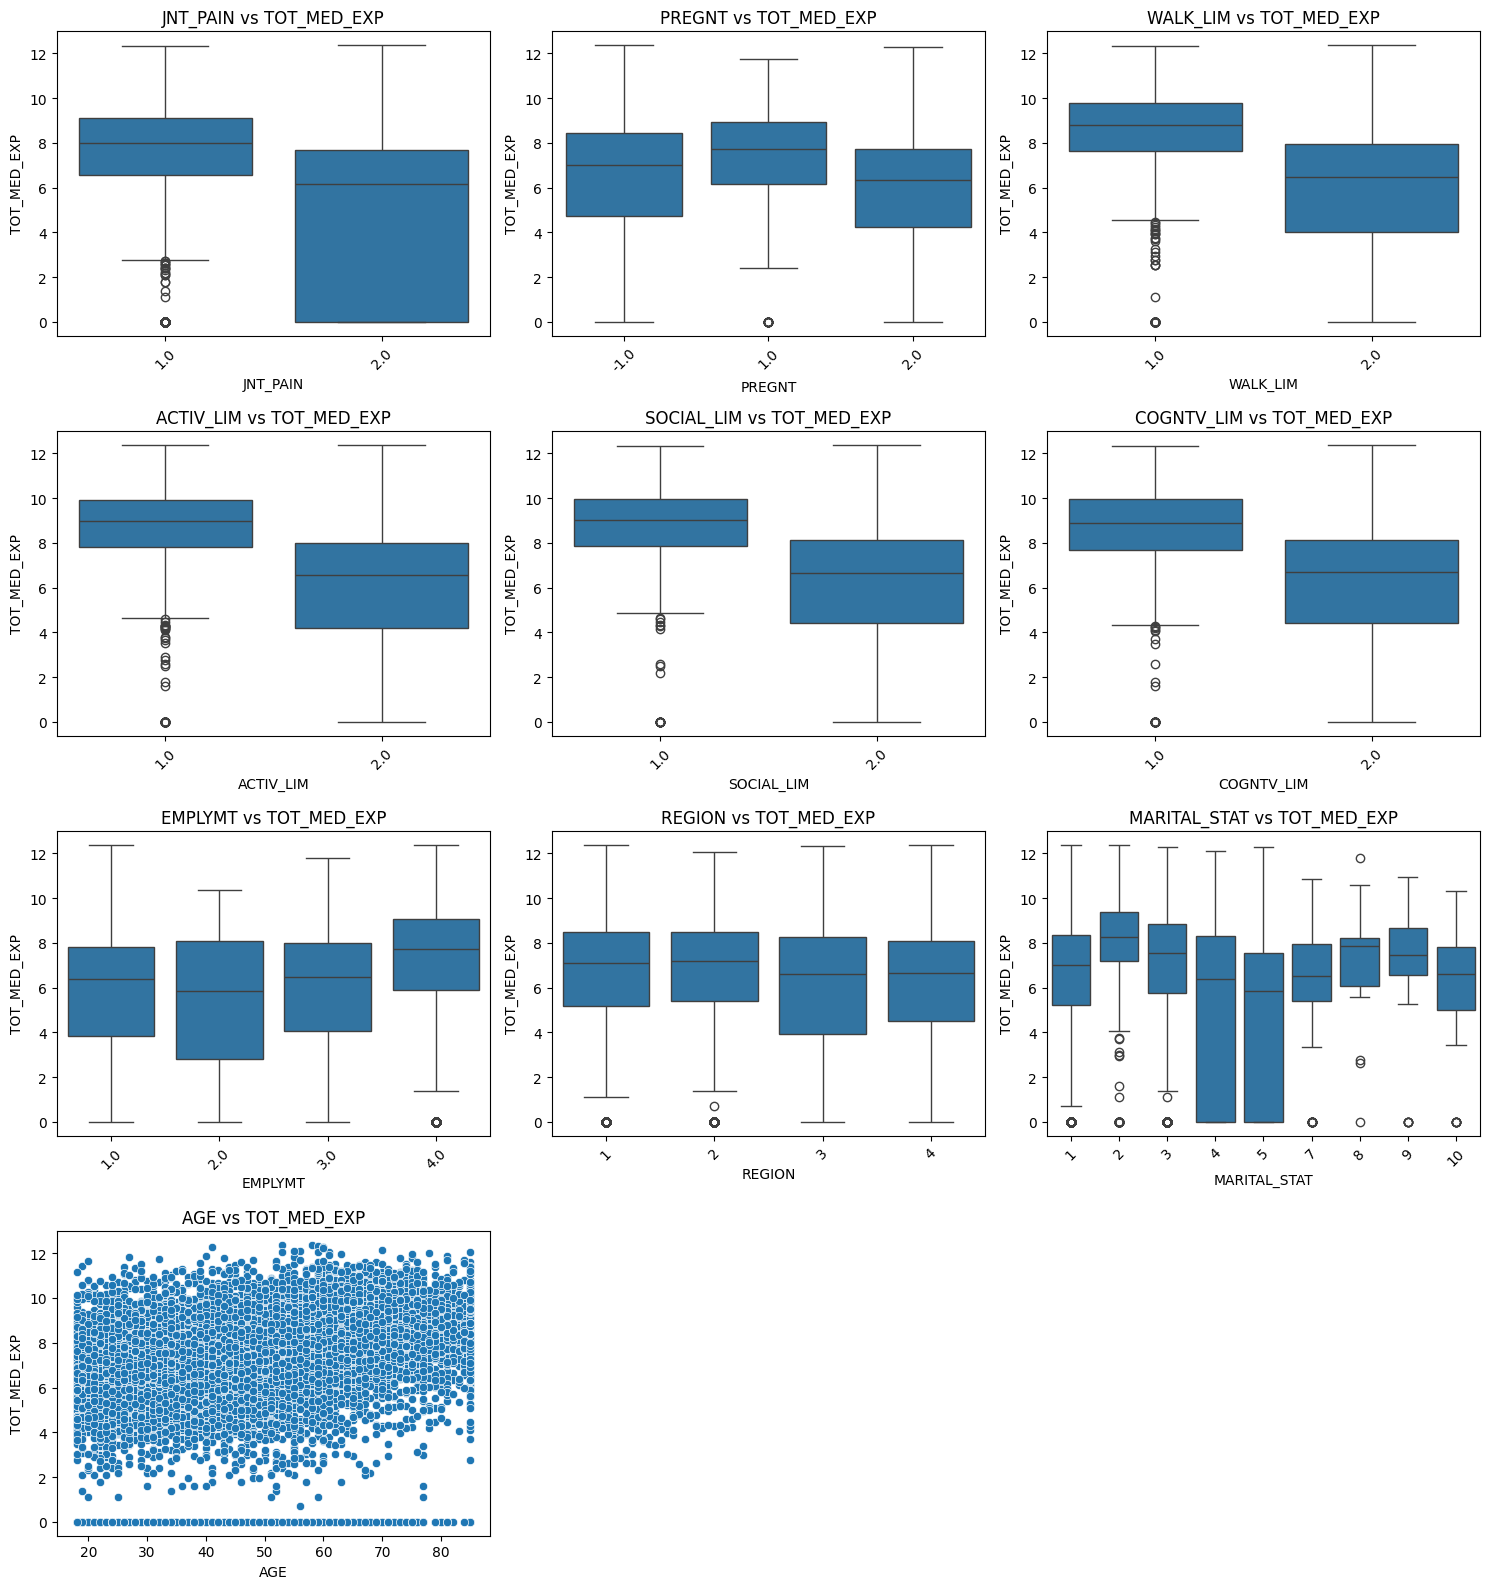

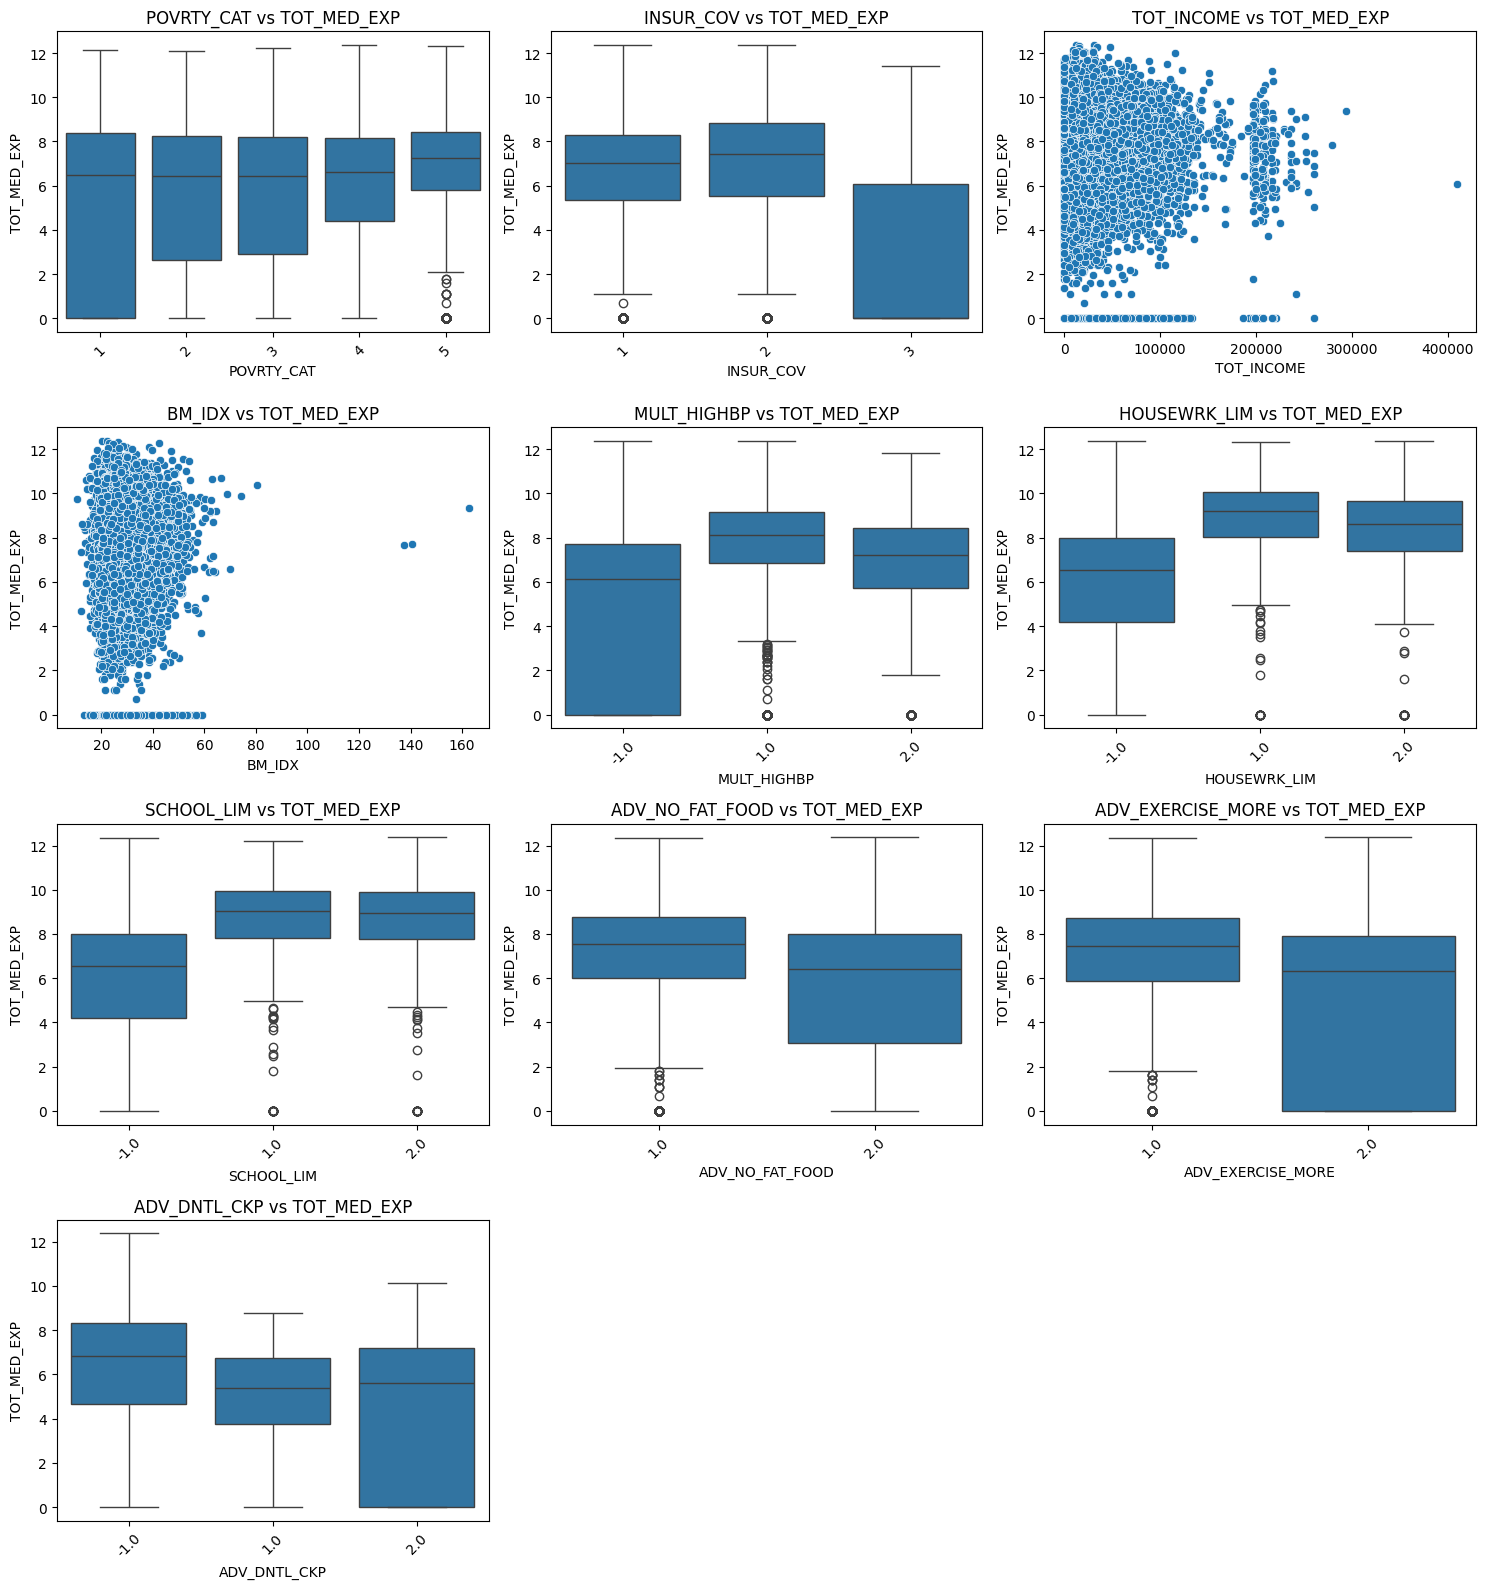

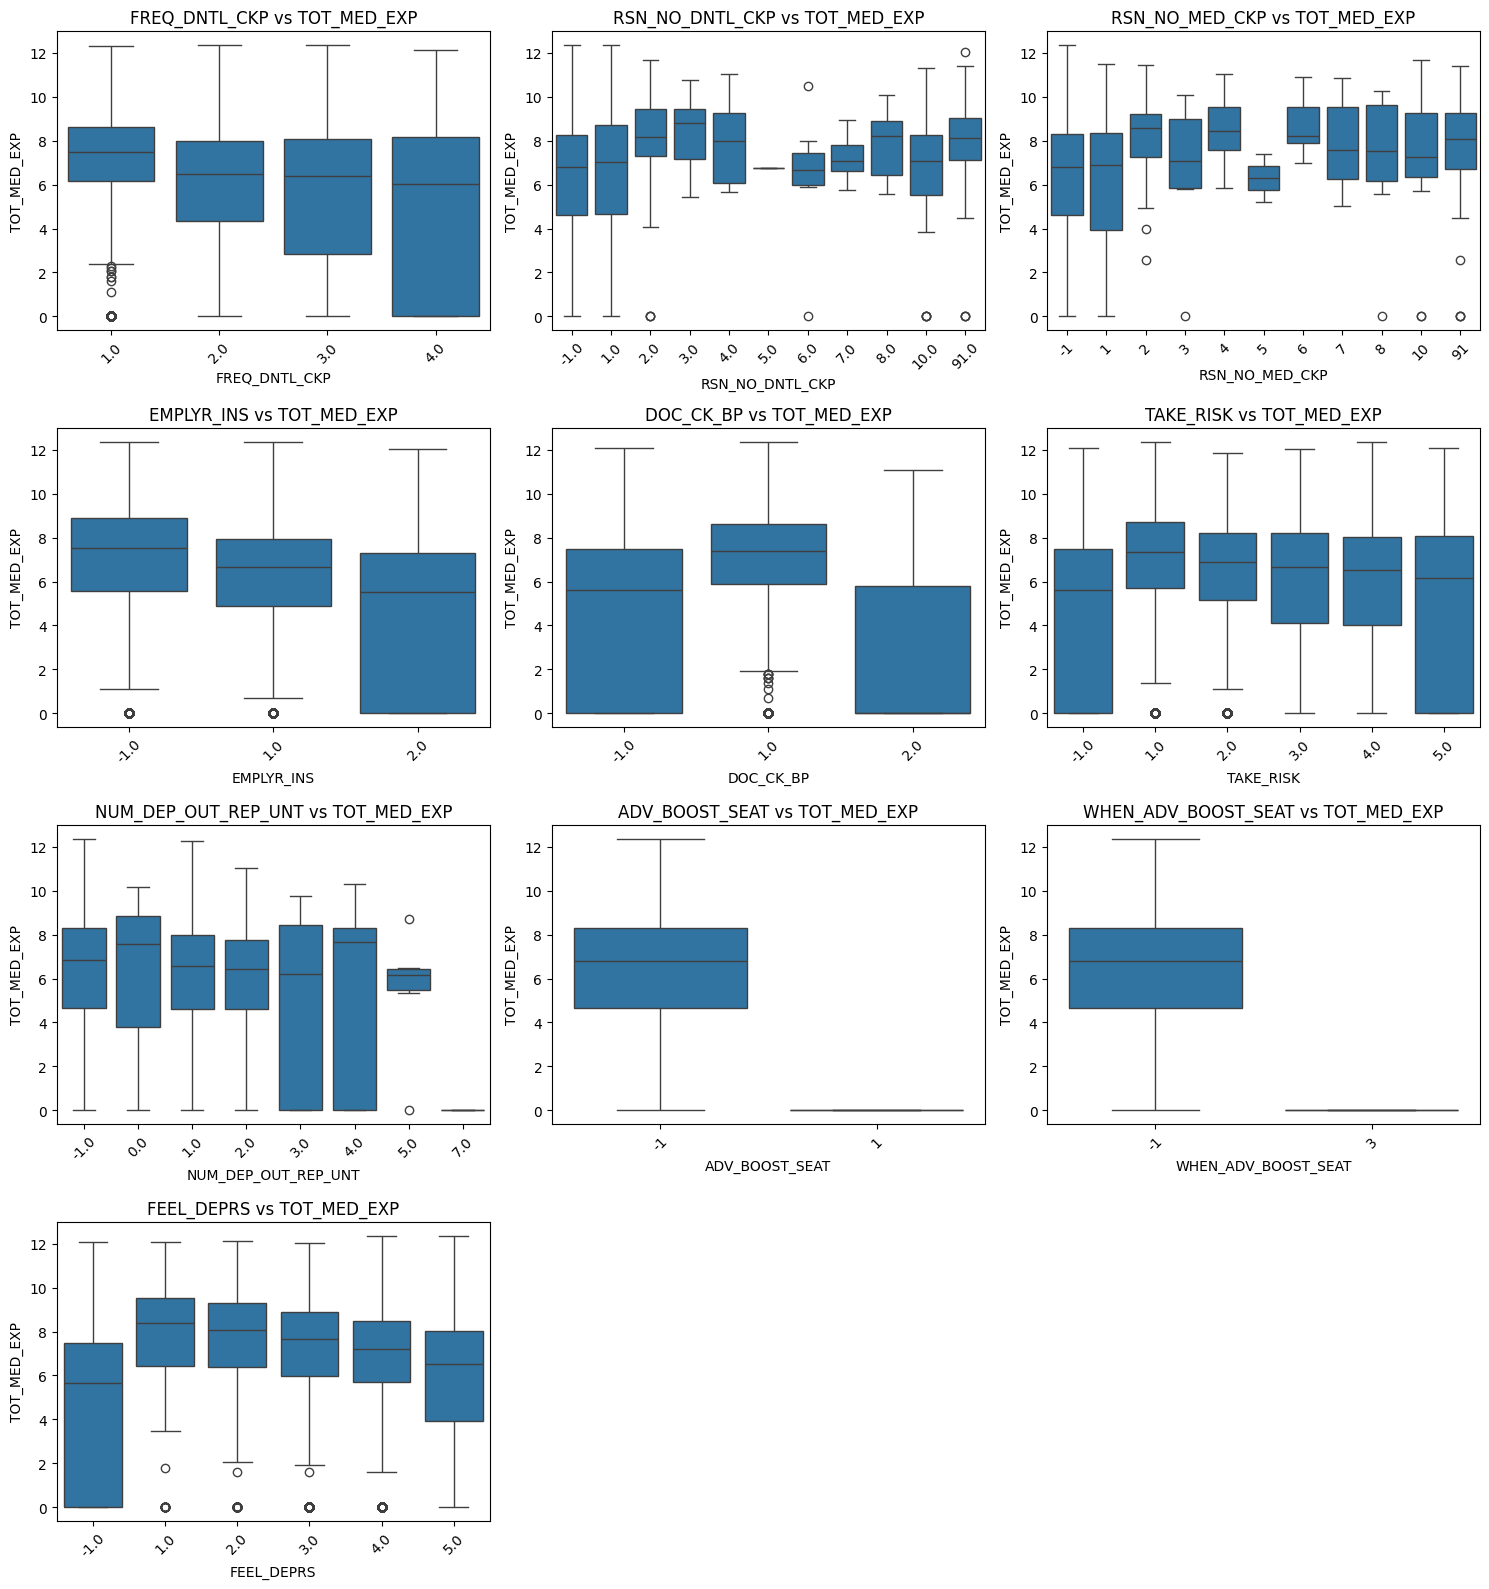

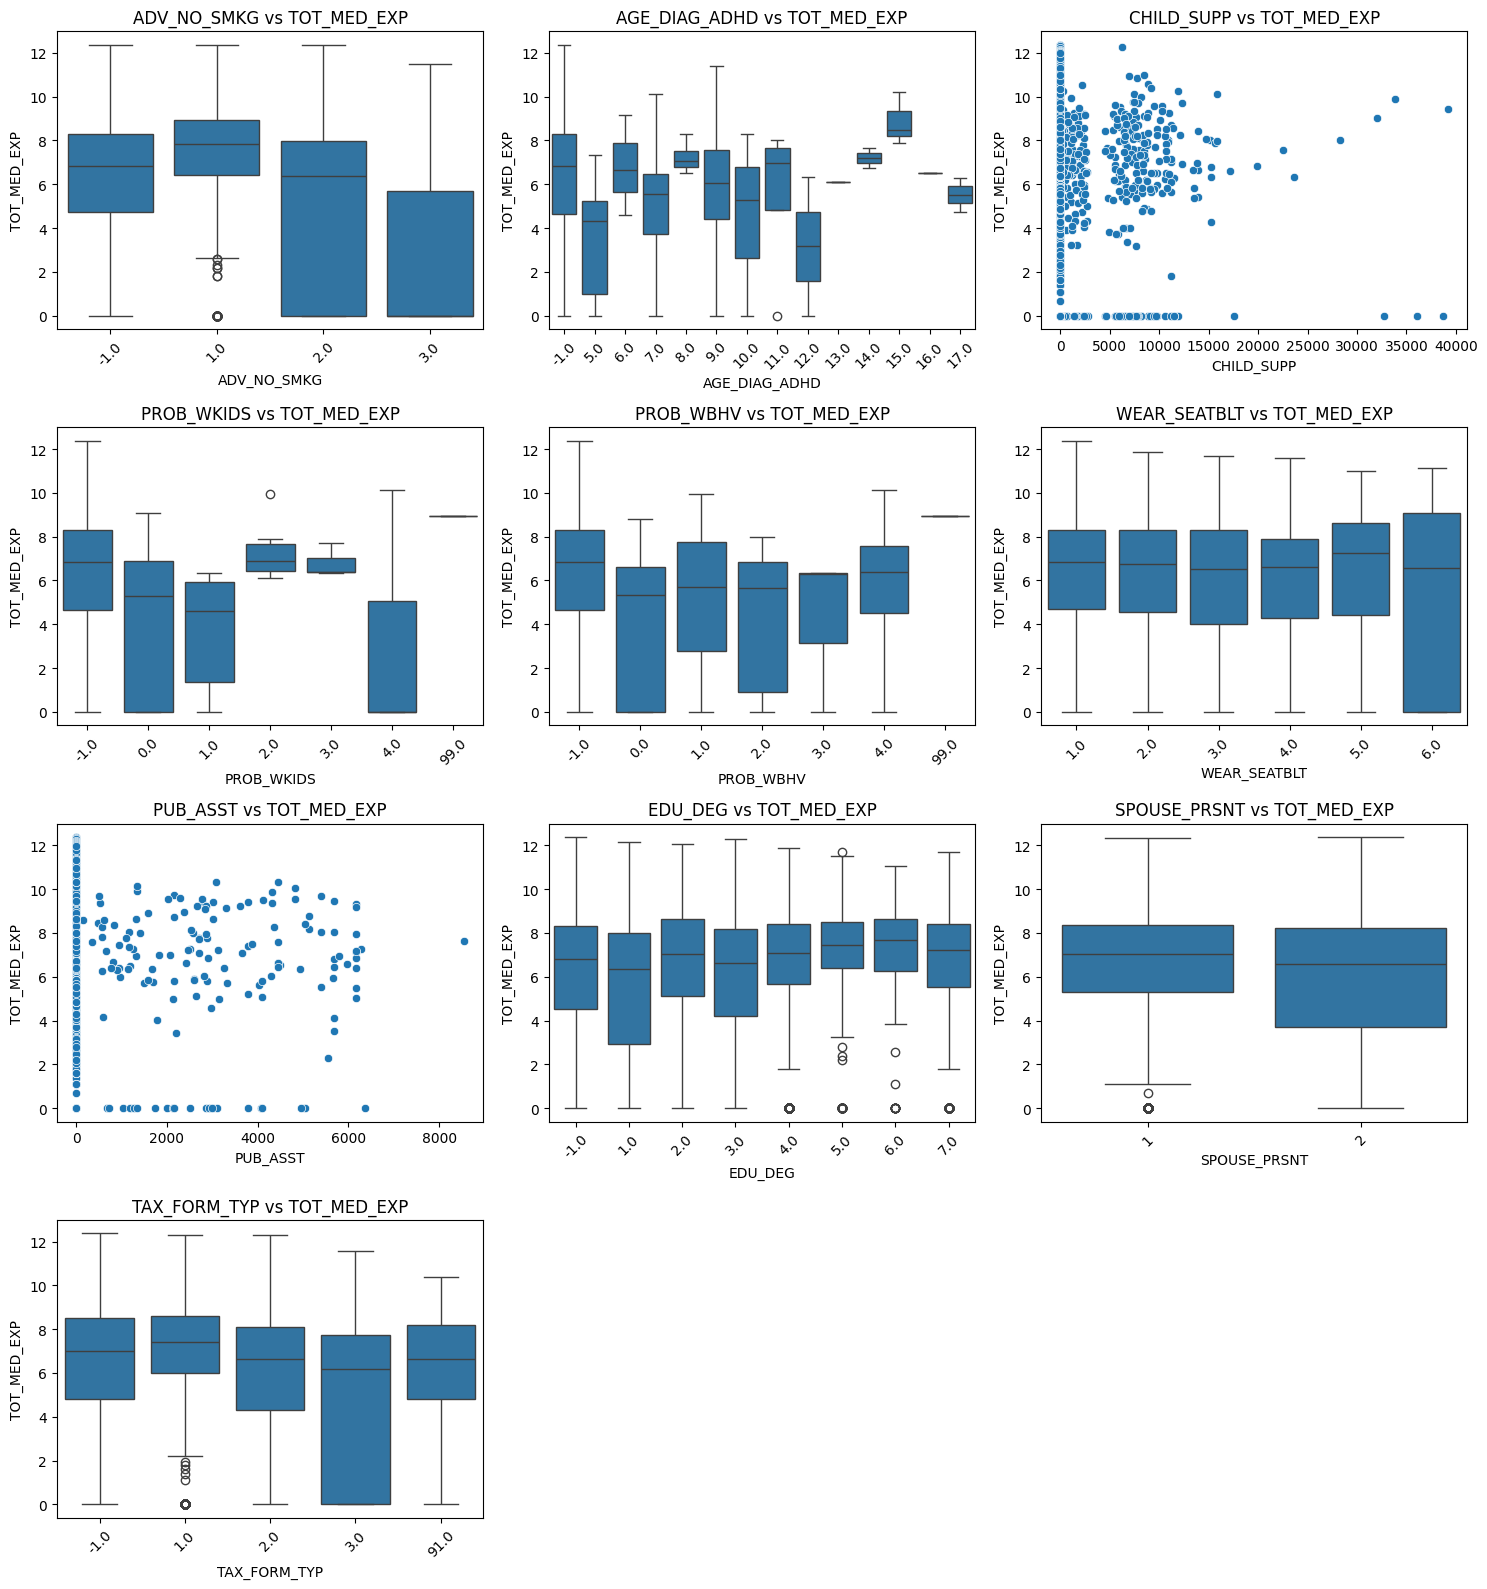

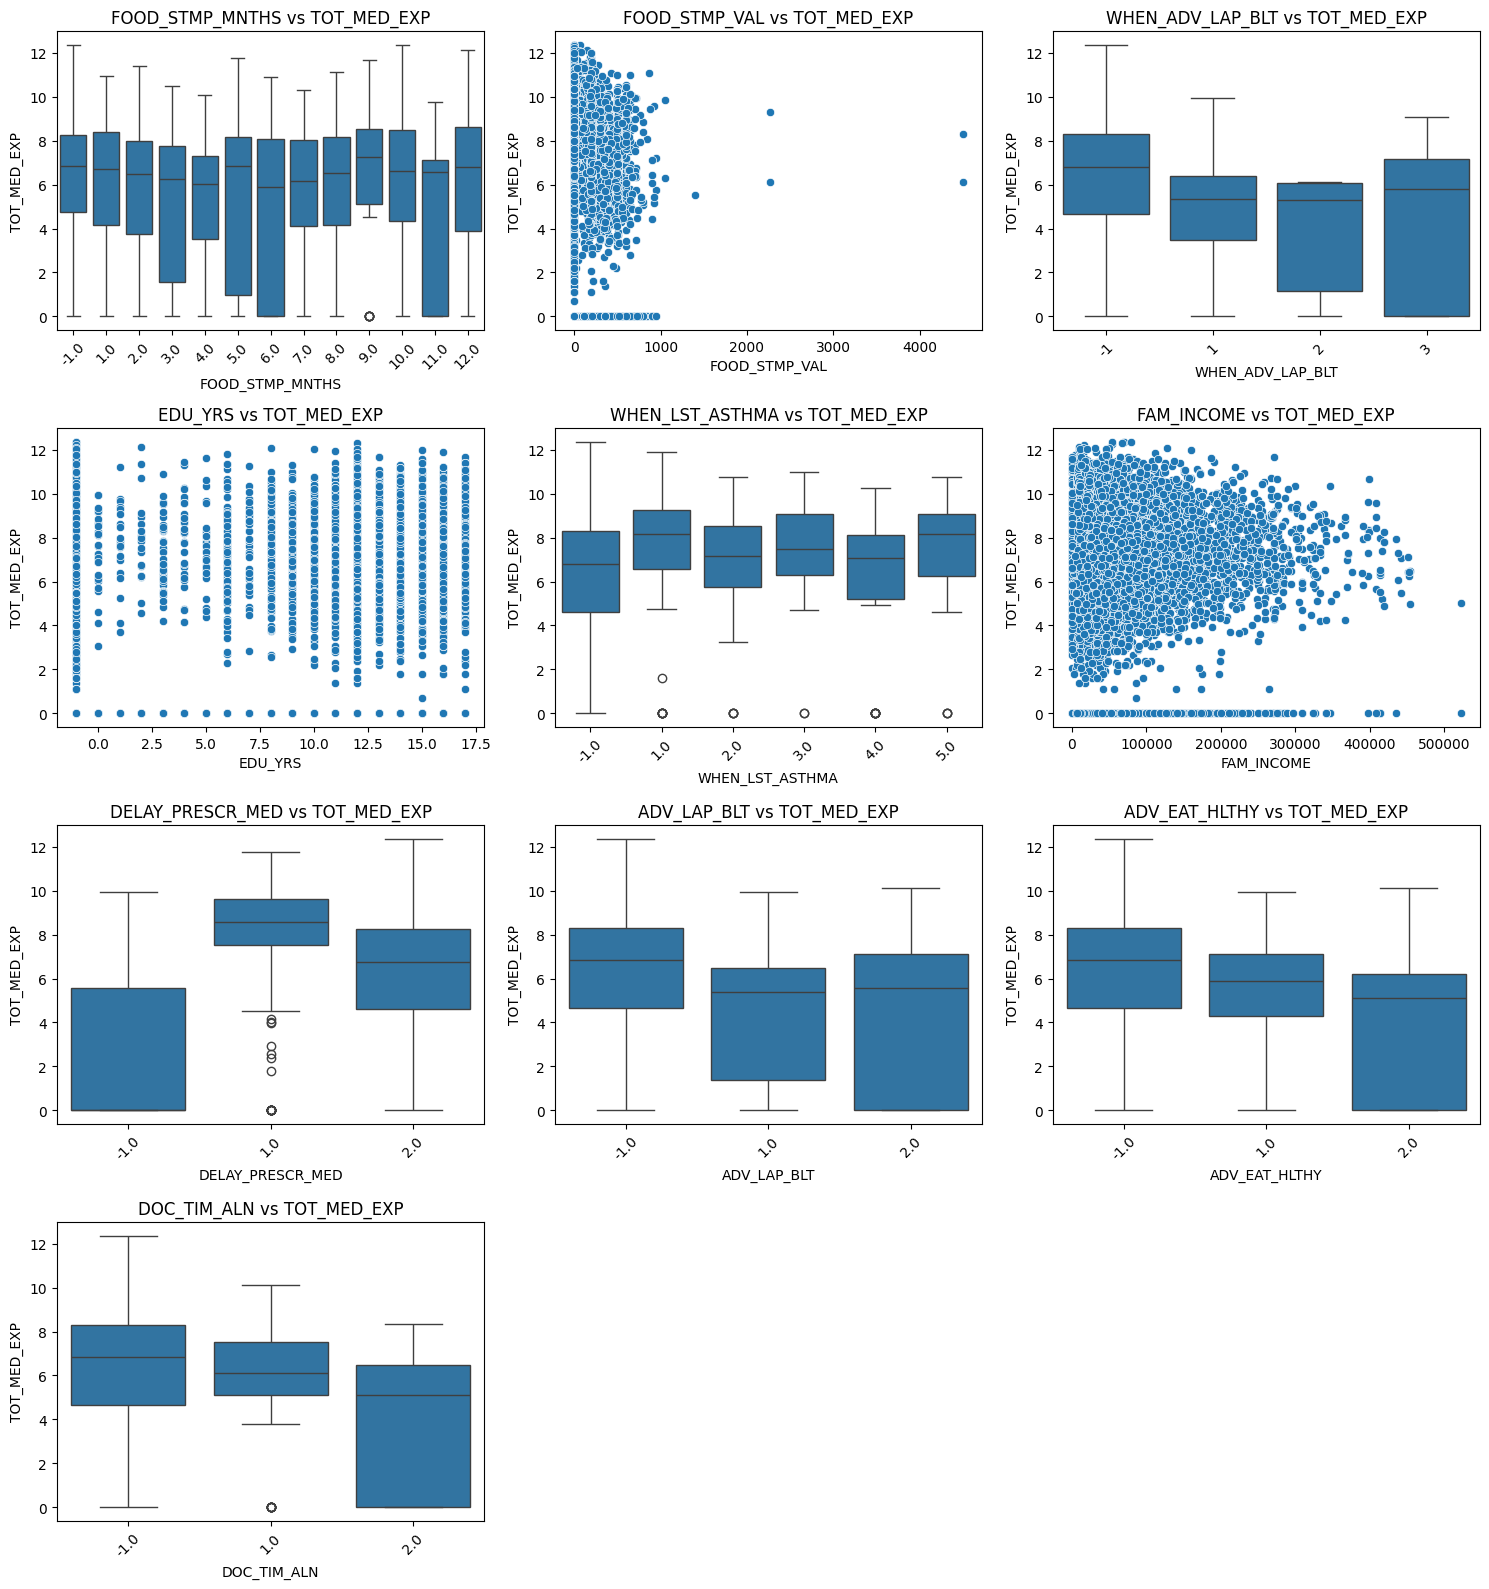

KeyboardInterrupt: 

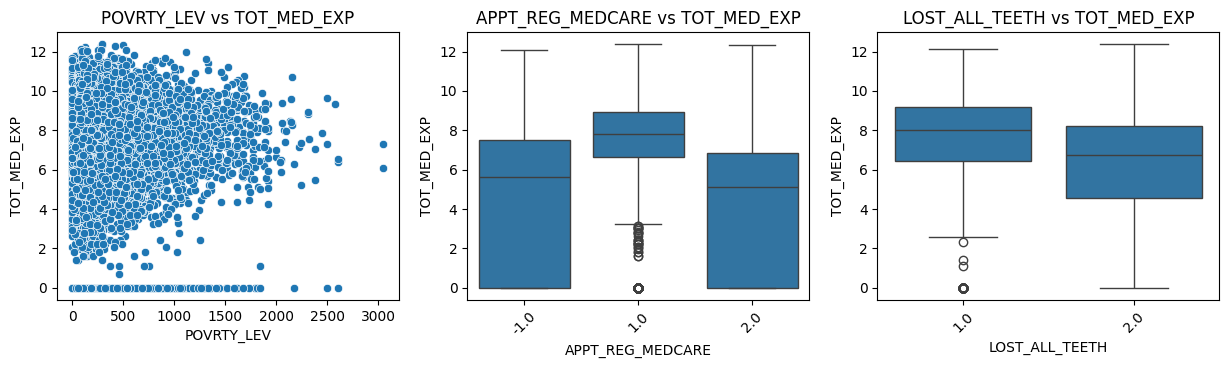

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is named df and the target variable is 'target'
target = 'TOT_MED_EXP'
features = [col for col in df_train_clnan.columns if col != target]
df_train_clnan[cat_cols] = df_train_clnan[cat_cols].astype('category')
df_train_clnan[num_cols] = df_train_clnan[num_cols].astype('float64')

# categorical_features = df_train_clnan.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_features = [col for col in features if col not in categorical_features]

numerical_features = [target]
# Apply log transformation to numerical features
df_log_transformed = df_train_clnan.copy()
for feature in numerical_features:
    # Handle zero or negative values by shifting the data
    if (df_log_transformed[feature] <= 0).any():
        df_log_transformed[feature] = df_log_transformed[feature] + abs(df_log_transformed[feature].min()) + 1
    # Apply log transformation
    df_log_transformed[feature] = np.log(df_log_transformed[feature])

# Function to plot in batches
def plot_in_batches(df, target, features, batch_size=10):
    total_features = len(features)
    for start in range(0, total_features, batch_size):
        end = min(start + batch_size, total_features)
        batch_features = features[start:end]

        plt.figure(figsize=(15, 5 * len(batch_features) // 3))
        for i, feature in enumerate(batch_features):
            plt.subplot(len(batch_features) // 3 + 1, 3, i + 1)
            if df[feature].dtype in ['object', 'category']:
                sns.boxplot(x=df[feature], y=df[target])
                plt.xticks(rotation=45)
            else:
                sns.scatterplot(x=df[feature], y=df[target])
            plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

# Plotting in batches of 10
plot_in_batches(df_log_transformed, target, features, batch_size=10)

In [ ]:
df_train_clnan

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720          -1.0             2.0   
1          White    1     20   5501.113581          -1.0             4.0   
2          White    1     20  16797.708379          -1.0             4.0   
3      Non-White    2     19   3605.218411          -1.0             2.0   
4      Non-White    1     19  11223.127404           1.0             2.0   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502          -1.0             2.0   
14996  Non-White    2     19   2808.751509          -1.0             2.0   
14997  Non-White    2     20  12237.098636          -1.0             2.0   
14998  Non-White    2     20   5370.704372          -1.0             2.0   
14999  Non-White    1     20   6685.613193          -1.0             2.0   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                2.0          2.0          2.0           2.0  ...   
1                2.0          1.0          1.0           2.0  ...   
2                1.0          3.0          1.0           2.0  ...   
3                2.0          3.0          3.0           2.0  ...   
4                2.0          1.0          2.0           2.0  ...   
...              ...          ...          ...           ...  ...   
14995            2.0          2.0          2.0           2.0  ...   
14996            2.0          4.0          3.0           2.0  ...   
14997            2.0          2.0          3.0           2.0  ...   
14998            2.0          3.0          3.0           2.0  ...   
14999            2.0          2.0          1.0           2.0  ...   

       NUM_PRESCR_MEDS  DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  \
0                    0          2.0         2.0   2.0          1.0   
1                   12          2.0         2.0   2.0          0.0   
2                   20          2.0         2.0   2.0          0.0   
3                   20          2.0         2.0   2.0          0.0   
4                    3          2.0         2.0   2.0          0.0   
...                ...          ...         ...   ...          ...   
14995                0          2.0         2.0   2.0          0.0   
14996                1          2.0         2.0   2.0          NaN   
14997                0          2.0         2.0   2.0          3.0   
14998                0          2.0         2.0  -1.0         -1.0   
14999                0          2.0         2.0   2.0          0.0   

       MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  
0                43.82         61.41          3.0            0          LOW  
1                60.12         54.80          0.0          240          LOW  
2                60.35         30.08          0.0          791          LOW  
3                58.32         50.22          0.0          272          LOW  
4                62.39         56.71          0.0         1264          LOW  
...                ...           ...          ...          ...          ...  
14995            58.15         52.91          0.0            0          LOW  
14996            60.29         52.11          NaN            4          LOW  
14997            22.14         67.11         10.0            0          LOW  
14998            -1.00         -1.00         -1.0          600          LOW  
14999            57.16         56.15          2.0            0          LOW  

[15000 rows x 110 columns]

In [ ]:
for i in df_train_clnan.columns:
  print(df_train_clnan[str(i)].value_counts())

# ["STUDENT_STAT", "MIL_ACTIV_DUTY", "HON_DISCHARGE", "HEALTH_STAT", "MENTAL_HLTH", "CHRON_BRONCH",
# "JNT_PAIN", "PREGNT", "WALK_LIM", "ACTIV_LIM", "SOCIAL_LIM", "COGNTV_LIM", "EMPLYMT", "MULT_HIGHBP", "HOUSEWRK_LIM"
# "SCHOOL_LIM", "ADV_NO_FAT_FOOD", "ADV_EXERCISE_MORE", "ADV_DNTL_CKP", "FREQ_DNTL_CKP", "FREQ_DNTL_CKP", "EMPLYR_INS",]

RACE
Non-White    8754
White        6246
Name: count, dtype: int64
SEX
2    7990
1    7010
Name: count, dtype: int64
PANEL
20    7992
19    7008
Name: count, dtype: int64
WEIGHT
0.000000        592
2145.893984       3
3633.038798       2
6136.500997       2
5712.900187       2
               ... 
7405.549638       1
7511.545707       1
13327.967880      1
2625.013852       1
6685.613193       1
Name: count, Length: 14361, dtype: int64
STUDENT_STAT
-1.0    13330
 3.0      820
 1.0      692
 2.0      156
Name: count, dtype: int64
MIL_ACTIV_DUTY
2.0    11359
4.0     3618
1.0       21
Name: count, dtype: int64
HON_DISCHARGE
2.0    13963
1.0      951
4.0       21
Name: count, dtype: int64
HEALTH_STAT
2.0    4651
3.0    4453
1.0    3627
4.0    1790
5.0     466
Name: count, dtype: int64
MENTAL_HLTH
1.0    5345
2.0    4239
3.0    4064
4.0    1091
5.0     249
Name: count, dtype: int64
CHRON_BRONCH
2.0    14683
1.0      285
Name: count, dtype: int64
JNT_PAIN
2.0    10027
1.0     4919
Name: count

In [ ]:
df_train["AGE_DIAG_ADHD"].value_counts()

AGE_DIAG_ADHD
-1     14959
 5         6
 7         5
 11        4
 9         4
 8         4
 6         3
 10        3
 15        3
 17        2
 14        2
 12        2
 16        1
 13        1
-8         1
Name: count, dtype: int64

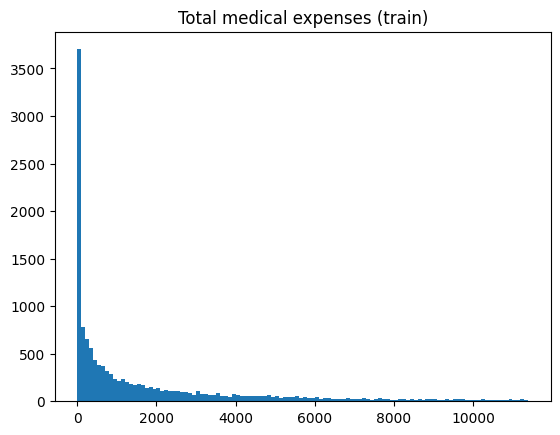

In [ ]:
# TODO: explore the data thoroughly, i.e. look for missing values, plot feature histograms, etc

# This is a (rather bad) plot to get you started:
plt.hist(df_train['TOT_MED_EXP'], bins=range(min(df_train['TOT_MED_EXP']), max(df_train['TOT_MED_EXP'])-225000, 100))
plt.title("Total medical expenses (train)")
plt.show()

## Data Preprocessing

In [ ]:
highly_correlated_columns = ["HOUSEWRK_LIM", "SCHOOL_LIM", "WHEN_ADV_BOOST_SEAT", "PROB_WKIDS", "ADV_LAP_BLT", "ADV_EAT_HLTHY", "DOC_TIM_ALN", "APPT_REG_MEDCARE",
                             "DIAB_KIDNY", "DIAB_INSLN", "ARTHR_DIAG", "OCCUP",  "PANEL", "EDU_DEG", "EMPLYR_INS", "SMOK", "MENTAL_HLTH_SCR", "PHY_HLTH_SCR",
                             "POVRTY_LEV", "UNABL_PRES_MED"]


print(len(highly_correlated_columns))

20


In [ ]:
df_train

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720            -1               2   
1          White    1     20   5501.113581            -1               4   
2          White    1     20  16797.708379            -1               4   
3      Non-White    2     19   3605.218411            -1               2   
4      Non-White    1     19  11223.127404             1               2   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502            -1               2   
14996  Non-White    2     19   2808.751509            -1               2   
14997  Non-White    2     20  12237.098636            -1               2   
14998  Non-White    2     20   5370.704372            -1               2   
14999  Non-White    1     20   6685.613193            -1               2   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                  2            2            2             2  ...   
1                  2            1            1             2  ...   
2                  1            3            1             2  ...   
3                  2            3            3             2  ...   
4                  2            1            2             2  ...   
...              ...          ...          ...           ...  ...   
14995              2            2            2             2  ...   
14996              2            4            3             2  ...   
14997              2            2            3             2  ...   
14998              2            3            3             2  ...   
14999              2            2            1             2  ...   

       NUM_PRESCR_MEDS  DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  \
0                    0            2           2     2            1   
1                   12            2           2     2            0   
2                   20            2           2     2            0   
3                   20            2           2     2            0   
4                    3            2           2     2            0   
...                ...          ...         ...   ...          ...   
14995                0            2           2     2            0   
14996                1            2           2     2           -9   
14997                0            2           2     2            3   
14998                0            2           2    -1           -1   
14999                0            2           2     2            0   

       MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  
0                43.82         61.41            3            0          LOW  
1                60.12         54.80            0          240          LOW  
2                60.35         30.08            0          791          LOW  
3                58.32         50.22            0          272          LOW  
4                62.39         56.71            0         1264          LOW  
...                ...           ...          ...          ...          ...  
14995            58.15         52.91            0            0          LOW  
14996            60.29         52.11           -9            4          LOW  
14997            22.14         67.11           10            0          LOW  
14998            -1.00         -1.00           -1          600          LOW  
14999            57.16         56.15            2            0          LOW  

[15000 rows x 110 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# for col_name in df_train_clnan.columns:
#   print(col_name)
# df_train_clnan[str(col_name)] = OneHotEncoder().fit_transform(df_train_clnan[str(col_name)])
df_train_clnan.replace(np.NaN, '-100',inplace=True)
df_train_clnan[cat_cols] = df_train_clnan[cat_cols].astype('category')
df_train_clnan[num_cols] = df_train_clnan[num_cols].astype('float64')
a = pd.get_dummies(df_train_clnan, columns = cat_cols, drop_first=True)

mimxscalar = MinMaxScaler()
b = mimxscalar.fit_transform(a[num_cols])
b = pd.DataFrame(b, columns= num_cols)

a = a.drop(columns=b.columns)

a = pd.concat([a, b], axis=1)

# a = OneHotEncoder(sparse_output=False).fit_transform(df_train_clnan[cat_cols])

In [ ]:
a

TOT_MED_EXP UTILIZATION  SMOK_1.0  SMOK_2.0  SMOK_-100  \
0                0         LOW     False      True      False   
1              240         LOW     False      True      False   
2              791         LOW     False      True      False   
3              272         LOW     False      True      False   
4             1264         LOW     False      True      False   
...            ...         ...       ...       ...        ...   
14995            0         LOW     False      True      False   
14996            4         LOW     False      True      False   
14997            0         LOW     False      True      False   
14998          600         LOW     False     False      False   
14999            0         LOW     False      True      False   

       WEAR_SEATBLT_2.0  WEAR_SEATBLT_3.0  WEAR_SEATBLT_4.0  WEAR_SEATBLT_5.0  \
0                 False             False             False             False   
1                 False             False             False             False   
2                 False              True             False             False   
3                 False             False             False             False   
4                 False             False             False             False   
...                 ...               ...               ...               ...   
14995             False             False             False             False   
14996             False             False             False             False   
14997              True             False             False             False   
14998             False             False             False             False   
14999             False             False             False             False   

       WEAR_SEATBLT_6.0  ...  FOOD_STMP_VAL   EDU_YRS  FAM_INCOME  POVRTY_LEV  \
0                 False  ...       0.097826  0.846154    0.073976    0.052619   
1                 False  ...       0.021522  0.957265    0.028753    0.030973   
2                 False  ...       0.021522  0.957265    0.066937    0.079882   
3                 False  ...       0.086957  0.846154    0.053136    0.048998   
4                 False  ...       0.021522  0.846154    0.536582    0.494812   
...                 ...  ...            ...       ...         ...         ...   
14995             False  ...       0.021522  0.846154    0.241538    0.222735   
14996             False  ...       0.021522  0.846154    0.065173    0.032729   
14997             False  ...       0.021522  0.974359    0.063257    0.087705   
14998             False  ...       0.021522  0.897436    0.093926    0.056771   
14999             False  ...       0.021522  0.982906    0.076675    0.106309   

       DAYS_ILL_NOWORK  DAYS_ILL_NOSCHL  NUM_PRESCR_MEDS  MENTAL_HLTH_SCR  \
0              0.62500         0.868421         0.000000         0.819440   
1              0.00000         0.868421         0.046693         0.912313   
2              0.62500         0.868421         0.077821         0.913623   
3              0.61875         0.868421         0.077821         0.902057   
4              0.00000         0.877193         0.011673         0.925246   
...                ...              ...              ...              ...   
14995          0.63750         0.868421         0.000000         0.901088   
14996          0.68750         0.868421         0.003891         0.913281   
14997          0.63125         0.868421         0.000000         0.695915   
14998          0.62500         0.868421         0.000000         0.564070   
14999          0.63125         0.868421         0.000000         0.895448   

       PHY_HLTH_SCR  OVR_FEEL_30  
0          0.938048     0.830645  
1          0.899634     0.806452  
2          0.755971     0.806452  
3          0.873017     0.806452  
4          0.910734     0.806452  
...             ...          ...  
14995      0.888650     0.806452  
14996      0.884001     0.000000  
14997      0.971175     0.887097  
14998

## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
# df_train_clnan['RACE'] = LabelEncoder().fit_transform(df_train_clnan['RACE'])
# df_train_clnan['UTILIZATION'] = LabelEncoder().fit_transform(df_train_clnan['UTILIZATION'])

# y = df_train_clnan['TOT_MED_EXP']
# X = df_train_clnan.drop(columns=['TOT_MED_EXP', 'UTILIZATION'])

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k=459)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def select_featuresnew(X_train, y_train):
    fs = SelectKBest(score_func=f_regression, k=88)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

# c = a[["AGE", 'TOT_MED_EXP', 'UTILIZATION']]
df_train_clnan[cat_cols] = df_train_clnan[cat_cols].astype('category')
df_train_clnan[num_cols] = df_train_clnan[num_cols].astype('float64')
df_train_clnan = df_train_clnan.replace(np.NaN, '100')

# y = df_train['TOT_MED_EXP']
# X = df_train.drop(columns=['TOT_MED_EXP', 'UTILIZATION'])

# X_train, X_val_1, y_train, y_val_1 = train_test_split(X, y, test_size=0.3, random_state=40)
# # a = a[(a['TOT_MED_EXP'] > 10000) & (a['TOT_MED_EXP'] < 25000)]
# a = a[a['TOT_MED_EXP'] > 25000]
# y = a['TOT_MED_EXP']
# X = a.drop(columns=['TOT_MED_EXP', 'UTILIZATION'])


# scaler = MinMaxScaler()

# # for col_name in df_train_clnan.columns:
# #   print(col_name)
# # df_train_clnan[str(col_name)] = OneHotEncoder().fit_transform(df_train_clnan[str(col_name)])
# a = pd.get_dummies(df_train, columns = cat_cols, drop_first=True)

# mimxscalar = MinMaxScaler()
# b = mimxscalar.fit_transform(a[num_cols])
# b = pd.DataFrame(b, columns= num_cols)

# a = a.drop(columns=b.columns)

# a = pd.concat([a, b], axis=1)
df_train_clnan['RACE'] = LabelEncoder().fit_transform(df_train_clnan['RACE'])
mimxscalar = MinMaxScaler()
b = mimxscalar.fit_transform(df_train_clnan[num_cols])
b = pd.DataFrame(b, columns= num_cols)

df_train_clnan = df_train_clnan.drop(columns=b.columns)

df_train_clnan = pd.concat([df_train_clnan, b], axis=1)
y = df_train_clnan['TOT_MED_EXP']
print(y)
y = np.log(np.array(y), where=np.array(y)!=0)
X = df_train_clnan.drop(columns=['TOT_MED_EXP', 'UTILIZATION'])

print("Labels have shape {}".format(y.shape), "features have shape {}".format(X.shape))

# Split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_fs, fs = select_featuresnew(X, y)

0           0
1         240
2         791
3         272
4        1264
         ... 
14995       0
14996       4
14997       0
14998     600
14999       0
Name: TOT_MED_EXP, Length: 15000, dtype: int64
Labels have shape (15000,) features have shape (15000, 108)


In [ ]:
df_train_clnan4

RACE SEX PANEL STUDENT_STAT MIL_ACTIV_DUTY HON_DISCHARGE HEALTH_STAT  \
5         1   2    20         -1.0            4.0           2.0         2.0   
11        1   2    19         -1.0            4.0           2.0         2.0   
12        1   2    20         -1.0            2.0           2.0         4.0   
14        1   2    20         -1.0            2.0           2.0         3.0   
17        1   2    19         -1.0            4.0           2.0         3.0   
...     ...  ..   ...          ...            ...           ...         ...   
14973     1   2    19         -1.0            4.0           2.0         2.0   
14976     1   2    20         -1.0            4.0           2.0         1.0   
14977     1   2    19         -1.0            2.0           2.0         2.0   
14979     1   2    20         -1.0            2.0           2.0         3.0   
14984     1   2    20         -1.0            2.0           2.0         1.0   

      MENTAL_HLTH CHRON_BRONCH JNT_PAIN  ... FOOD_STMP_VAL   EDU_YRS  \
5             2.0          2.0      1.0  ...      0.021522  0.974359   
11            2.0          2.0      1.0  ...      0.021522  0.846154   
12            4.0          2.0      1.0  ...      0.063043  0.940171   
14            3.0          2.0      2.0  ...      0.032609  0.957265   
17            3.0          2.0      1.0  ...      0.055217  0.846154   
...           ...          ...      ...  ...           ...       ...   
14973         2.0          2.0      1.0  ...      0.021522  0.846154   
14976         1.0          2.0      2.0  ...      0.021522  1.000000   
14977         1.0          2.0      2.0  ...      0.021522  0.846154   
14979         1.0          2.0      1.0  ...      0.021522  0.957265   
14984         1.0          2.0      2.0  ...      0.021522  1.000000   

      FAM_INCOME POVRTY_LEV DAYS_ILL_NOWORK DAYS_ILL_NOSCHL NUM_PRESCR_MEDS  \
5       0.105836   0.114011         0.62500        0.868421        0.128405   
11      0.217553   0.200617         0.81250        0.868421        0.101167   
12      0.007667   0.007069         0.61875        0.868421        0.105058   
14      0.133222   0.122853         0.64375        0.868421        0.000000   
17      0.051165   0.076955         0.61875        0.868421        0.299611   
...          ...        ...             ...             ...             ...   
14973   0.100348   0.150928         0.61875        0.868421        0.058366   
14976   0.105428   0.113568         0.62500        0.868421        0.023346   
14977   0.095843   0.085889         0.63750        0.868421        0.019455   
14979   0.273155   0.251889         0.63125        0.868421        0.019455   
14984   0.184063   0.126651         0.00000        0.868421        0.000000   

      MENTAL_HLTH_SCR PHY_HLTH_SCR OVR_FEEL_30  
5            0.901943     0.856512    0.830645  
11           0.850379     0.856977    0.830645  
12           0.749302     0.695589    0.951613  
14           0.889864     0.894113    0.822581  
17           0.923708     0.799326    0.000000  
...               ...          ...         ...  
14973        0.564070     0.575347    0.798387  
14976        0.878013     0.924682    0.814516  
14977        0.912313     0.899634    0.806452  
14979        0.710273     0.947173    0.879032  
14984        0.913338     0.835241    0.814516  

[3233 rows x 110 columns]

In [ ]:
X_train_fs.shape

(15000, 88)

In [ ]:
y_train = np.log10(np.array(y_train), where=np.array(y_train)!=0)

In [ ]:
y_train

array([7.49942329, 0.        , 6.70196037, ..., 6.49828215, 8.61721951,
       6.5971457 ])

In [ ]:
X_train_fs.shape

(15000, 108)

In [ ]:
temp['RACE'] = LabelEncoder().fit_transform(temp['RACE'])
temp['UTILIZATION'] = LabelEncoder().fit_transform(temp['UTILIZATION'])

NameError: name 'temp' is not defined

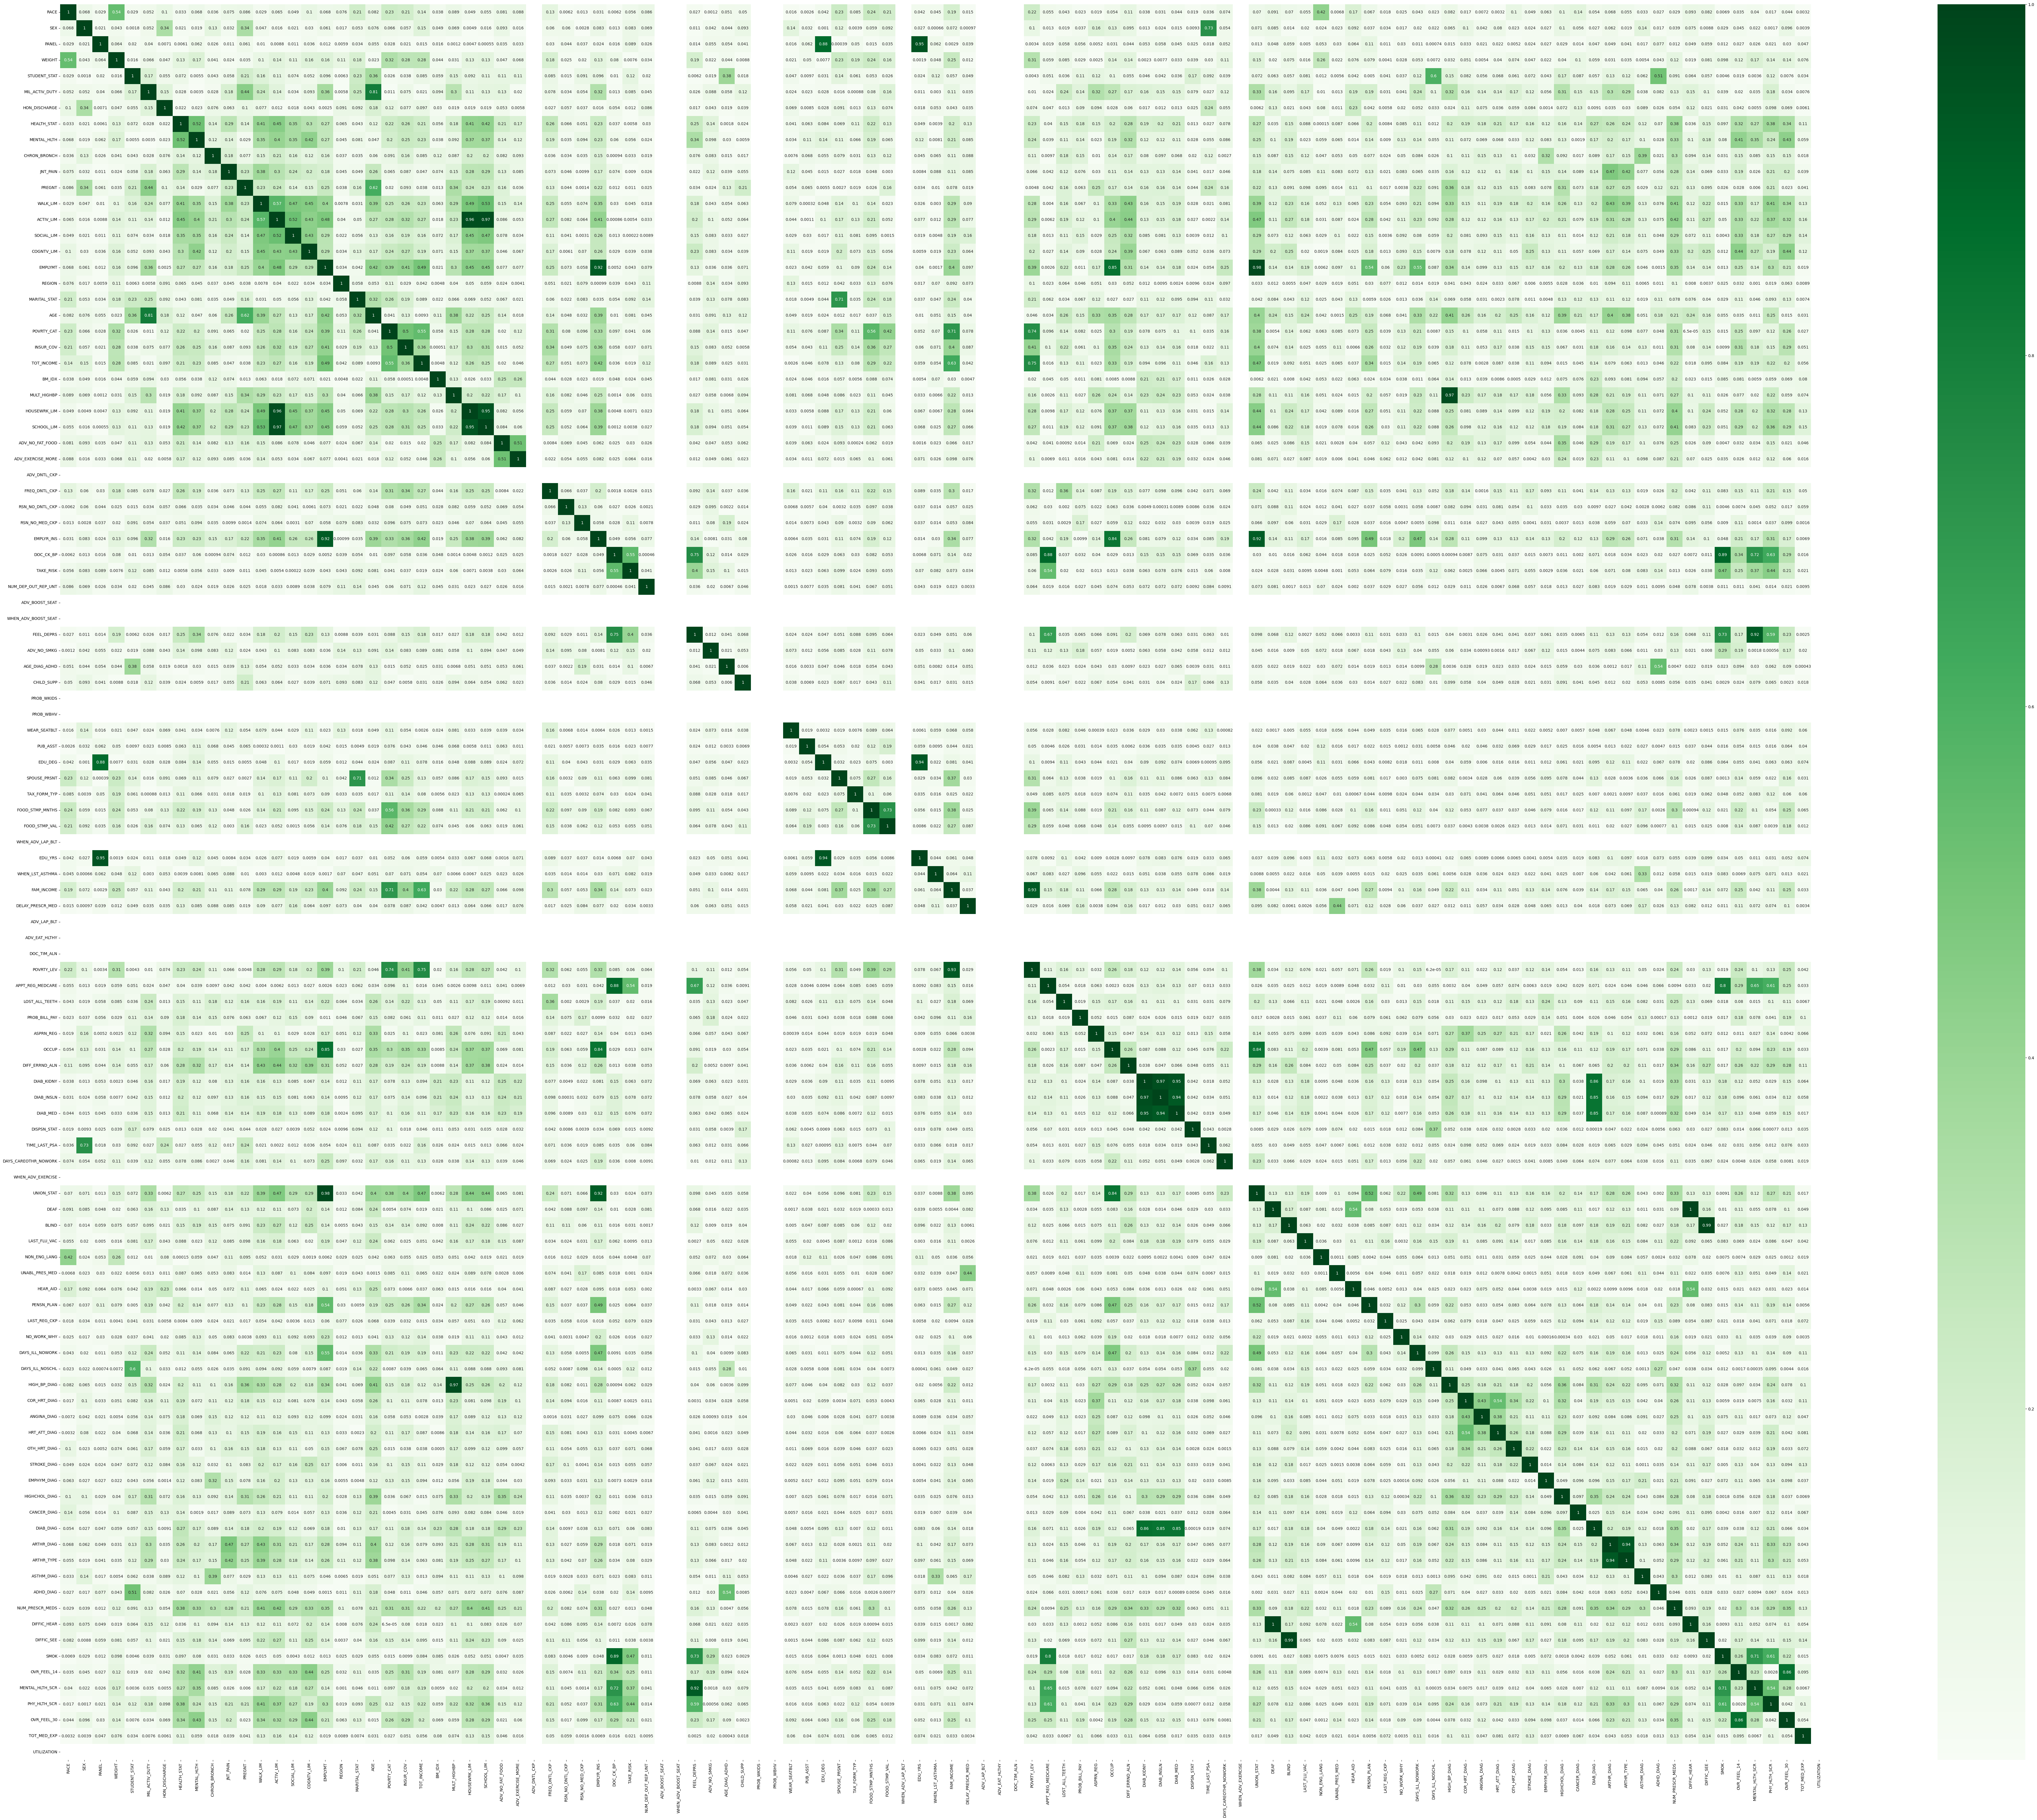

In [ ]:
import seaborn as sns
corr = temp.corr(method="pearson")
# corr.style.background_gradient(cmap='RdBu')
plt.figure(figsize=(100,80))
sns.heatmap(abs(corr), cmap="Greens",annot=True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, svd_solver='full')
pca_m = pca.fit(X_train)
z = pca_m.transform(X_train)

## Training



In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import MinMaxScaler


# params = {
#         'C':[0.1,1,10,100],
#         'kernel':['poly', 'rbf', 'sigmoid'],
#         'degree':[3,4,5]
#         }

params = {
        'n_estimators': [600],
        'min_child_weight': [50],
        'gamma': [1.5],
        'subsample': [0.8],
        'colsample_bytree': [1.0],
        'max_depth':[3],
        'learning_rate': [0.05]
        }


xgb = XGBRegressor(nthread=6,
                    eval_metric='auc', device = "cuda:0",
                    enable_categorical=True, tree_method="hist")

# svr = SVR()
# clf = MLPClassifier(solver='adam',
#                     hidden_layer_sizes=(50,10), random_state=1, max_iter = 4000)

# skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)
cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
random_search = GridSearchCV(xgb, param_grid=params, n_jobs=10, cv=cvFold)
# randomResults = random_search.fit(cp.asarray(z), y_train)
randomResults = random_search.fit(X_train_fs, y)
print("Done")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:54:19] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:54:19] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


Done


In [ ]:
# cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
# random_search = GridSearchCV(xgb, param_grid=params, n_jobs=10, cv=cvFold)
# randomResults = random_search.fit(cp.asarray(z), y_train)
# X_train_fs = selector.transform(X_train)
randomResults = random_search.fit(X_train, y_train)
print("Done")

In [ ]:
params = {
        'n_estimators': [600],
        'min_child_weight': [50],
        'gamma': [1.5],
        'subsample': [0.8],
        'colsample_bytree': [1.0],
        'max_depth':[3],
        'learning_rate': [0.05]
        }

cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
random_search = GridSearchCV(selector, param_grid=params, n_jobs=10, cv=cvFold)
# randomResults = random_search.fit(cp.asarray(z), y_train)
# X_train_fs = selector.transform(X_train)
randomResults = random_search.fit(X_train, y_train)
print("Done")

In [ ]:
X_train

RACE SEX PANEL STUDENT_STAT MIL_ACTIV_DUTY HON_DISCHARGE HEALTH_STAT  \
4834      0   2    20         -1.0            2.0           2.0         3.0   
12171     0   1    20          3.0            2.0           2.0         1.0   
3502      1   1    20         -1.0            2.0           2.0         2.0   
11546     1   2    19         -1.0            2.0           2.0         2.0   
6950      1   1    19         -1.0            4.0           2.0         4.0   
...     ...  ..   ...          ...            ...           ...         ...   
905       1   2    20         -1.0            4.0           2.0         5.0   
5192      0   1    19         -1.0            2.0           2.0         3.0   
12172     1   1    20          1.0            2.0           2.0         1.0   
235       1   2    19         -1.0            4.0           2.0         3.0   
13349     1   1    19         -1.0            2.0           2.0         2.0   

      MENTAL_HLTH CHRON_BRONCH JNT_PAIN  ... FOOD_STMP_VAL   EDU_YRS  \
4834          5.0          2.0      2.0  ...      0.021522  0.957265   
12171         3.0          2.0      2.0  ...      0.021522  0.957265   
3502          2.0          2.0      2.0  ...      0.021522  0.991453   
11546         3.0          2.0      2.0  ...      0.021522  0.846154   
6950          3.0          2.0      1.0  ...      0.021522  0.846154   
...           ...          ...      ...  ...           ...       ...   
905           3.0          2.0      1.0  ...      0.025217  0.957265   
5192          3.0          2.0      2.0  ...      0.060870  0.846154   
12172         1.0          2.0      2.0  ...      0.021522  0.957265   
235           3.0          2.0      1.0  ...      0.021522  0.846154   
13349         2.0          2.0      2.0  ...      0.021522  0.846154   

      FAM_INCOME POVRTY_LEV DAYS_ILL_NOWORK DAYS_ILL_NOSCHL NUM_PRESCR_MEDS  \
4834    0.193412   0.208348         0.62500        0.868421        0.062257   
12171   0.125075   0.086063         0.00000        0.000000        0.000000   
3502    0.145203   0.133900         0.64375        0.868421        0.011673   
11546   0.070924   0.050449         0.62500        0.868421        0.003891   
6950    0.092201   0.110032         0.61875        0.868421        0.050584   
...          ...        ...             ...             ...             ...   
905     0.015734   0.023665         0.61875        0.868421        0.439689   
5192    0.019935   0.027640         0.62500        0.868421        0.000000   
12172   0.193603   0.178532         0.00000        0.903509        0.007782   
235     0.054073   0.074969         0.63125        0.868421        0.229572   
13349   0.281779   0.193886         0.62500        0.868421        0.042802   

      MENTAL_HLTH_SCR PHY_HLTH_SCR OVR_FEEL_30  
4834         0.881944     0.905794    0.806452  
12171        0.895448     0.907480    0.814516  
3502         0.901088     0.888650    0.830645  
11546        0.831349     0.929215    0.879032  
6950         0.758475     0.849189    0.870968  
...               ...          ...         ...  
905          0.850493     0.718022    0.846774  
5192         0.793288     0.837566    0.854839  
12172        0.925246     0.910734    0.806452  
235          0.905305     0.863602    0.822581  
13349        0.913281     0.884001    0.814516  

[10500 rows x 108 columns]

In [ ]:
import cudf
X_train_cu = cudf.from_pandas(X_train)

In [ ]:
X_train_fs

array([[0, 1, 19, ..., 43.82, 61.41, 3.0],
       [1, 1, 20, ..., 60.12, 54.8, 0.0],
       [1, 1, 20, ..., 60.35, 30.08, 0.0],
       ...,
       [0, 2, 20, ..., 22.14, 67.11, 10.0],
       [0, 2, 20, ..., -1.0, -1.0, -1.0],
       [0, 1, 20, ..., 57.16, 56.15, 2.0]], dtype=object)

In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    # "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
#     y_pred = randomResults.predict(pca_m.transform(X_i))
    # y_pred = randomResults.predict(fs.transform(X_i))
    y_pred = randomResults.predict(fs.transform(X_i))
    print(y_pred)
    y_pred = np.array([2.71828**(i) for i in y_pred])
    y_i = np.array([2.71828**(j) for j in y_i])
    print(y_pred)
    print("y_i", y_i)
    y_pred = np.where(y_pred<0, 0, y_pred)
#     y_i, y_pred = mimxscalar.inverse_transform(np.array([y_i, y_pred]))
#     y_pred = mimxscalar.inverse_transform(np.array([y_pred]))

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")

    # These might also be helpful to look at. Think about why!
    print("\tsqrt(median((y-pred)**2)):",np.sqrt(np.median((y_i-y_pred)**2)))
    print("\tmedian(abs(y-pred)):",np.median(abs(y_i-y_pred)))

    print('\n\n')

Split: training data

[7.6361194 1.8070426 7.2179513 ... 7.0505567 8.597976  6.932381 ]
[2071.67808978    6.09239568 1363.6857763  ... 1153.49520088 5420.6442216
 1024.92681602]
y_i [1.80699088e+03 1.00000000e+00 8.13996330e+02 ... 6.63997098e+02
 5.52596797e+03 7.32996747e+02]
	RMSE: 10900.58
	MAE: 3418.45
	sqrt(median((y-pred)**2)): 604.0839897175365
	median(abs(y-pred)): 604.0839709840648





In [ ]:
X.columns

Index(['RACE', 'SEX', 'PANEL', 'WEIGHT', 'STUDENT_STAT', 'MIL_ACTIV_DUTY',
       'HON_DISCHARGE', 'HEALTH_STAT', 'MENTAL_HLTH', 'CHRON_BRONCH',
       ...
       'ASTHM_DIAG', 'ADHD_DIAG', 'NUM_PRESCR_MEDS', 'DIFFIC_HEAR',
       'DIFFIC_SEE', 'SMOK', 'OVR_FEEL_14', 'MENTAL_HLTH_SCR', 'PHY_HLTH_SCR',
       'OVR_FEEL_30'],
      dtype='object', length=108)

## Testing

In [ ]:
# Run this to save a file with your predictions on the test set to be submitted
team_id = 8
split = 'test_private' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'/content/{split}.csv')
df_test_clnan = df_test.replace(-9, np.nan)
df_test_clnan = df_test_clnan.replace(-8, np.nan)
df_test_clnan = df_test_clnan.replace(-7, np.nan)
print(df_test_clnan["ACTIV_LIM"].value_counts())
df_test_clnan.replace(np.NaN, '-100',inplace=True)
df_train_clnan['RACE'] = LabelEncoder().fit_transform(df_train_clnan['RACE'])

df_test_clnan[cat_cols] = df_test_clnan[cat_cols].astype('category')
df_test_clnan[num_cols] = df_test_clnan[num_cols].astype('float64')
trs = LabelEncoder().fit(df_train_clnan['RACE'])
df_test_clnan['RACE'] = trs.fit_transform(df_test_clnan['RACE'])
# Process data
# a = pd.get_dummies(df_test_clnan, columns = cat_cols, drop_first=True)
# a
# b = mimxscalar.fit_transform(a[num_cols])
# b = pd.DataFrame(b, columns= num_cols)

# a = a.drop(columns=b.columns)

# a = pd.concat([a, b], axis=1)
# print(a.shape)
m = list(df_train_clnan.columns)
m.remove('TOT_MED_EXP')
m.remove('UTILIZATION')
print(len(m))
df_test_clnan = df_test_clnan[m]
a = fs.transform(df_test_clnan)
# df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

y_hat = randomResults.predict(a)
y_hat = np.array([2.71828**(i) for i in y_hat])
print(y_hat)
# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy

folder = './'
np.save(os.path.join(folder, f'{team_id}__{split}__reg_pred.npy'), y_hat) # Note the double underscores '__' in the filename

ACTIV_LIM
2.0    4399
1.0     592
Name: count, dtype: int64
108
[  1298.83968176  69992.76288648  17918.46131977 ...   5240.81755725
 101287.91461859  11789.03368221]


## Random Experiments

In [ ]:
df_train_clnan

RACE SEX PANEL STUDENT_STAT MIL_ACTIV_DUTY HON_DISCHARGE HEALTH_STAT  \
0         0   1    19         -1.0            2.0           2.0         2.0   
1         1   1    20         -1.0            4.0           2.0         1.0   
2         1   1    20         -1.0            4.0           1.0         3.0   
3         0   2    19         -1.0            2.0           2.0         3.0   
4         0   1    19          1.0            2.0           2.0         1.0   
...     ...  ..   ...          ...            ...           ...         ...   
14995     0   1    19         -1.0            2.0           2.0         2.0   
14996     0   2    19         -1.0            2.0           2.0         4.0   
14997     0   2    20         -1.0            2.0           2.0         2.0   
14998     0   2    20         -1.0            2.0           2.0         3.0   
14999     0   1    20         -1.0            2.0           2.0         2.0   

      MENTAL_HLTH CHRON_BRONCH JNT_PAIN  ... FOOD_STMP_VAL   EDU_YRS  \
0             2.0          2.0      2.0  ...      0.097826  0.846154   
1             1.0          2.0      2.0  ...      0.021522  0.957265   
2             1.0          2.0      2.0  ...      0.021522  0.957265   
3             3.0          2.0      1.0  ...      0.086957  0.846154   
4             2.0          2.0      1.0  ...      0.021522  0.846154   
...           ...          ...      ...  ...           ...       ...   
14995         2.0          2.0      2.0  ...      0.021522  0.846154   
14996         3.0          2.0      2.0  ...      0.021522  0.846154   
14997         3.0          2.0      2.0  ...      0.021522  0.974359   
14998         3.0          2.0      1.0  ...      0.021522  0.897436   
14999         1.0          2.0      2.0  ...      0.021522  0.982906   

      FAM_INCOME POVRTY_LEV DAYS_ILL_NOWORK DAYS_ILL_NOSCHL NUM_PRESCR_MEDS  \
0       0.073976   0.052619         0.62500        0.868421        0.000000   
1       0.028753   0.030973         0.00000        0.868421        0.046693   
2       0.066937   0.079882         0.62500        0.868421        0.077821   
3       0.053136   0.048998         0.61875        0.868421        0.077821   
4       0.536582   0.494812         0.00000        0.877193        0.011673   
...          ...        ...             ...             ...             ...   
14995   0.241538   0.222735         0.63750        0.868421        0.000000   
14996   0.065173   0.032729         0.68750        0.868421        0.003891   
14997   0.063257   0.087705         0.63125        0.868421        0.000000   
14998   0.093926   0.056771         0.62500        0.868421        0.000000   
14999   0.076675   0.106309         0.63125        0.868421        0.000000   

      MENTAL_HLTH_SCR PHY_HLTH_SCR OVR_FEEL_30  
0            0.819440     0.938048    0.830645  
1            0.912313     0.899634    0.806452  
2            0.913623     0.755971    0.806452  
3            0.902057     0.873017    0.806452  
4            0.925246     0.910734    0.806452  
...               ...          ...         ...  
14995        0.901088     0.888650    0.806452  
14996        0.913281     0.884001    0.000000  
14997        0.695915     0.971175    0.887097  
14998        0.564070     0.575347    0.798387  
14999        0.895448     0.907480    0.822581  

[15000 rows x 110 columns]

In [ ]:
m = list(df_train_clnan.columns)
m.remove('TOT_MED_EXP')
m.remove('UTILIZATION')
print(len(m))

108


In [ ]:
df_test_clnan = df_test_clnan[m]

In [ ]:
df_test_clnan

RACE SEX PANEL STUDENT_STAT MIL_ACTIV_DUTY HON_DISCHARGE HEALTH_STAT  \
0        1   2    19           -1              4           2.0         1.0   
1        1   2    20           -1              2           2.0         2.0   
2        1   2    20            1              2          -100         2.0   
3        0   2    19           -1              2           2.0         2.0   
4        1   2    19           -1              2           2.0         2.0   
...    ...  ..   ...          ...            ...           ...         ...   
4786     0   1    20           -1              2           2.0         1.0   
4787     0   1    19           -1              4           1.0         1.0   
4788     0   1    19           -1              2           2.0         5.0   
4789     0   2    20           -1              2           2.0         4.0   
4790     0   1    19            1              2           2.0         3.0   

     MENTAL_HLTH CHRON_BRONCH JNT_PAIN  ... FOOD_STMP_VAL EDU_YRS FAM_INCOME  \
0            5.0          2.0      2.0  ...          -1.0    -1.0    18952.0   
1            2.0          2.0      1.0  ...          -1.0    13.0    45000.0   
2            3.0          2.0      2.0  ...          -1.0    12.0    84060.0   
3            1.0          2.0      1.0  ...          -1.0    -1.0        0.0   
4            1.0          2.0      2.0  ...          -1.0    -1.0    34000.0   
...          ...          ...      ...  ...           ...     ...        ...   
4786         1.0          2.0      2.0  ...          -1.0    16.0   142623.0   
4787         1.0          2.0      2.0  ...          -1.0    -1.0        0.0   
4788         2.0          2.0      2.0  ...          -1.0    -1.0     9781.0   
4789         3.0          2.0      2.0  ...          -1.0    17.0    95463.0   
4790         3.0          2.0      2.0  ...          -1.0    -1.0    48000.0   

     POVRTY_LEV DAYS_ILL_NOWORK DAYS_ILL_NOSCHL NUM_PRESCR_MEDS  \
0        166.73            -1.0            -1.0            29.0   
1        283.54             2.0            -1.0             0.0   
2        453.40          -100.0          -100.0             2.0   
3          0.00            -1.0            -1.0             5.0   
4        275.73             0.0            -1.0             0.0   
...         ...             ...             ...             ...   
4786     593.37             0.0            -1.0             0.0   
4787       0.00            -1.0            -1.0             0.0   
4788      79.32            -1.0            -1.0             7.0   
4789     329.24             0.0            -1.0             7.0   
4790     258.90             0.0             0.0             0.0   

     MENTAL_HLTH_SCR PHY_HLTH_SCR OVR_FEEL_30  
0              24.90        47.86        13.0  
1              55.30        55.60         2.0  
2              -1.00        -1.00        -1.0  
3              62.00        41.73         0.0  
4              57.16        56.15         0.0  
...              ...          ...         ...  
4786           54.10        59.11         2.0  
4787           60.12        54.80         0.0  
4788           44.72        31.07         6.0  
4789           60.53        48.35         0.0  
4790           50.54        62.09         0.0  

[4791 rows x 108 columns]

In [ ]:
# Run this to save a file with your predictions on the test set to be submitted
team_id = 8
split = 'test_public' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'/content/{split}.csv')
df_test_clnan = df_test.replace(-9, np.nan)
df_test_clnan = df_test_clnan.replace(-8, np.nan)
df_test_clnan = df_test_clnan.replace(-7, np.nan)
print(df_test_clnan["ACTIV_LIM"].value_counts())
df_test_clnan.replace(np.NaN, '-100.0',inplace=True)
df_train_clnan['RACE'] = LabelEncoder().fit_transform(df_train_clnan['RACE'])

df_test_clnan[cat_cols] = df_test_clnan[cat_cols].astype('category')
df_test_clnan[num_cols] = df_test_clnan[num_cols].astype('float64')
trs = LabelEncoder().fit(df_train_clnan['RACE'])
df_test_clnan['RACE'] = trs.fit_transform(df_test_clnan['RACE'])
# Process data
# a = pd.get_dummies(df_test_clnan, columns = cat_cols, drop_first=True)
# a
# b = mimxscalar.fit_transform(a[num_cols])
# b = pd.DataFrame(b, columns= num_cols)

# a = a.drop(columns=b.columns)

# a = pd.concat([a, b], axis=1)
# print(a.shape)
a = fs.transform(df_test_clnan)
# df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

y_hat = randomResults.predict(a)
y_hat = np.array([10**(i) for i in y_hat])
print(y_hat)
# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy

folder = './'
np.save(os.path.join(folder, f'{team_id}__{split}__reg_pred.npy'), y_hat) # Note the double underscores '__' in the filename

ACTIV_LIM
2.0    4247
1.0     524
Name: count, dtype: int64
[7.11870927e+03 1.82040274e+01 3.85338261e+02 ... 1.14602625e+03
 1.27319346e+03 5.23963441e+00]


In [ ]:
a

array([[1, 2, 19, ..., 24.9, 47.86, 13.0],
       [1, 2, 20, ..., 55.3, 55.6, 2.0],
       [1, 2, 20, ..., -1.0, -1.0, -1.0],
       ...,
       [0, 1, 19, ..., 44.72, 31.07, 6.0],
       [0, 2, 20, ..., 60.53, 48.35, 0.0],
       [0, 1, 19, ..., 50.54, 62.09, 0.0]], dtype=object)

In [ ]:
a

ARTHR_TYPE_1.0  ARTHR_TYPE_2.0  ARTHR_TYPE_3.0  ARTHR_TYPE_-100.0  \
0              False           False           False              False   
1              False           False           False              False   
2              False           False           False              False   
3              False           False           False              False   
4              False           False           False              False   
...              ...             ...             ...                ...   
4786           False           False           False              False   
4787           False           False           False              False   
4788           False           False           False              False   
4789           False           False           False              False   
4790           False           False           False              False   

      RACE_White  DEAF_1  DEAF_2  COR_HRT_DIAG_2.0  COR_HRT_DIAG_-100.0  \
0           True   False   False              True                False   
1           True   False   False              True                False   
2           True   False   False              True                False   
3          False   False   False              True                False   
4           True   False   False              True                False   
...          ...     ...     ...               ...                  ...   
4786       False   False   False              True                False   
4787       False   False   False              True                False   
4788       False   False   False              True                False   
4789       False   False   False             False                False   
4790       False   False   False              True                False   

      CANCER_DIAG_2.0  ...  FOOD_STMP_VAL   EDU_YRS  FAM_INCOME  POVRTY_LEV  \
0               False  ...       0.041807  0.846154    0.041721    0.064003   
1                True  ...       0.041807  0.965812    0.099062    0.108844   
2                True  ...       0.041807  0.957265    0.185048    0.174049   
3                True  ...       0.041807  0.846154    0.000000    0.000000   
4                True  ...       0.041807  0.846154    0.074847    0.105846   
...               ...  ...            ...       ...         ...         ...   
4786             True  ...       0.041807  0.991453    0.313968    0.227779   
4787             True  ...       0.041807  0.846154    0.000000    0.000000   
4788             True  ...       0.041807  0.846154    0.021532    0.030449   
4789             True  ...       0.041807  1.000000    0.210151    0.126387   
4790             True  ...       0.041807  0.846154    0.105666    0.099385   

      DAYS_ILL_NOWORK  DAYS_ILL_NOSCHL  NUM_PRESCR_MEDS  MENTAL_HLTH_SCR  \
0             0.61875         0.868421         0.104317         0.723345   
1             0.63750         0.868421         0.000000         0.899403   
2             0.00000         0.000000         0.007194         0.573348   
3             0.61875         0.868421         0.017986         0.938206   
4             0.62500         0.868421         0.000000         0.910175   
...               ...              ...              ...              ...   
4786          0.62500         0.868421         0.000000         0.892454   
4787          0.61875         0.868421         0.000000         0.927318   
4788          0.61875         0.868421         0.025180         0.838131   
4789          0.62500         0.868421         0.025180         0.929692   
4790          0.62500         0.877193         0.000000         0.871836   

      PHY_HLTH_SCR  OVR_FEEL_30  
0         0.872382     0.911290  
1         0.918048     0.822581  
2         0.584105     0.798387  
3         0.836215     0.806452  
4         0.921293     0.806452  
...            ...          ...  
4786      0.938757     0.822581  
4787      0.913328     0.806452  
4788      0.773320     0.854839  
47

In [ ]:
df_test =  pd.read_csv(f'/content/test_private.csv')
df_test_clnan = df_test.replace(-9, np.nan)
df_test_clnan = df_test_clnan.replace(-8, np.nan)
df_test_clnan = df_test_clnan.replace(-7, np.nan)
df_test_clnan.replace(np.NaN, '-100.0',inplace=True)
df_test[cat_cols] = df_test[cat_cols].astype('category')
df_test[num_cols] = df_test[num_cols].astype('float64')
df_test.shape
# Process data
b = pd.get_dummies(df_test, columns = cat_cols, drop_first=True)

In [ ]:
len(set(X.columns) - set(b.columns))

309

In [ ]:
len(set(b.columns) - set(X.columns))

321

In [ ]:
a['ADHD_DIAG_-100.0']

In [ ]:
set(X.columns) - set(a.columns)

{'ADHD_DIAG_-100.0',
 'ADHD_DIAG_1.0',
 'ADHD_DIAG_2.0',
 'ADV_BOOST_SEAT_1',
 'AGE_DIAG_ADHD_11.0',
 'DISPSN_STAT_22',
 'DISPSN_STAT_33',
 'HEAR_AID_-100.0',
 'HEAR_AID_1.0',
 'HEAR_AID_2.0',
 'MIL_ACTIV_DUTY_-100.0',
 'MIL_ACTIV_DUTY_2.0',
 'MIL_ACTIV_DUTY_4.0',
 'NUM_DEP_OUT_REP_UNT_5.0',
 'NUM_DEP_OUT_REP_UNT_7.0',
 'PROB_WBHV_-100.0',
 'PROB_WBHV_0.0',
 'PROB_WBHV_1.0',
 'PROB_WBHV_2.0',
 'PROB_WBHV_3.0',
 'PROB_WBHV_4.0',
 'PROB_WBHV_99.0',
 'PROB_WKIDS_-100.0',
 'PROB_WKIDS_0.0',
 'PROB_WKIDS_1.0',
 'PROB_WKIDS_2.0',
 'PROB_WKIDS_3.0',
 'PROB_WKIDS_4.0',
 'PROB_WKIDS_99.0',
 'RSN_NO_DNTL_CKP_-100.0',
 'RSN_NO_DNTL_CKP_1.0',
 'RSN_NO_DNTL_CKP_10.0',
 'RSN_NO_DNTL_CKP_2.0',
 'RSN_NO_DNTL_CKP_3.0',
 'RSN_NO_DNTL_CKP_4.0',
 'RSN_NO_DNTL_CKP_5.0',
 'RSN_NO_DNTL_CKP_6.0',
 'RSN_NO_DNTL_CKP_7.0',
 'RSN_NO_DNTL_CKP_8.0',
 'RSN_NO_DNTL_CKP_91.0',
 'RSN_NO_MED_CKP_5',
 'STUDENT_STAT_-100.0',
 'STUDENT_STAT_1.0',
 'STUDENT_STAT_2.0',
 'STUDENT_STAT_3.0',
 'WHEN_ADV_BOOST_SEAT_3'}

In [ ]:
len(set(a.columns) - set(X.columns))

28

In [ ]:
X["HEAR_AID_1.0"]

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: HEAR_AID_1.0, Length: 15000, dtype: bool

In [ ]:
print(randomResults.best_params_)

{'colsample_bytree': 1.0, 'gamma': 1.5, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 50, 'n_estimators': 600, 'subsample': 0.8}


In [ ]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

reg = XGBRegressor(enable_categorical=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
X_train.columns

Index(['RACE', 'SEX', 'PANEL', 'WEIGHT', 'STUDENT_STAT', 'MIL_ACTIV_DUTY',
       'HON_DISCHARGE', 'HEALTH_STAT', 'MENTAL_HLTH', 'CHRON_BRONCH',
       ...
       'ASTHM_DIAG', 'ADHD_DIAG', 'NUM_PRESCR_MEDS', 'DIFFIC_HEAR',
       'DIFFIC_SEE', 'SMOK', 'OVR_FEEL_14', 'MENTAL_HLTH_SCR', 'PHY_HLTH_SCR',
       'OVR_FEEL_30'],
      dtype='object', length=108)

In [ ]:
col_types = []
for col in X_train.columns:
  if col in num_cols:
    col_types.append("q")
  elif col in cat_cols:
    col_types.append("c")

In [ ]:
from sklearn.feature_selection import RFECV
selector = RFECV(reg, step=1, cv=5)
selector = selector.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
cols_idxs = selector.get_support(indices=True)

In [ ]:
len(cols_idxs)

80

In [ ]:
selector.support_.shape

(379,)

In [ ]:
selector.ranking_

array([ 48,  15, 115, 167,   4, 106, 165,  23,  22, 172,   1,  92, 164,
       182,  32,   1,   1,   1, 161,   1, 134,  53, 145, 181,   6,   1,
         1,   1, 175,   1,  57,   1, 117, 144,   1, 207,   1,  25,  11,
         1,   1, 178,   1,  44,  52,  82, 196, 162,  86, 104, 185, 187,
         1, 124,  58, 109,  41, 173,   7,  40, 244,  74, 114, 105, 111,
         1, 137,  18,   1,   1,   1,  68,  97,   1, 193,  10, 118, 110,
       243, 242,   1,  70, 253,   1, 177,  76,   1,  64,  84, 266, 268,
       254, 247, 249,   1, 129, 171,  55, 151,  90,   1,   1,   1,  95,
       112, 125, 147,  38,   2,  87, 183, 126, 271,  34, 274, 276, 199,
       209, 201,  79, 204,  62,   1,  29,   1,   1,   1,  12,   1, 220,
       222, 224,   1, 101, 229, 119, 116,   1, 149,   1,   1,   1,  51,
        17,   1,   1,   3, 168,  72,  66, 215,   1, 159, 228,   1, 103,
       245,  30, 102, 170, 148,  99, 156, 133, 130, 120,  73, 160, 107,
       216,   1,   1, 232,   1,   1,  31, 256, 258, 260,  49,   

In [ ]:
pwd

'/content/drive/MyDrive/MLProject'

In [ ]:
!pip install scikit-learn

In [ ]:
from pickle import dump
with open("selector.pkl", "wb") as f:
    dump(selector, f, protocol=5)

In [ ]:
from pickle import load
with open("/kaggle/input/selector/scikitlearn/default/1/selector.pkl", "rb") as f:
    selector = load(f)

In [ ]:
# X_train.rename(columns={'RACE_1':'RACE_White'}, inplace=True)
X_reduced = selector.transform(X_train)

In [ ]:
X_reduced

array([[0.        , 0.        , 0.        , ..., 0.13043478, 0.01945525,
        0.36363636],
       [0.        , 0.        , 0.        , ..., 0.13043478, 0.        ,
        0.27272727],
       [0.        , 0.        , 0.        , ..., 0.11594203, 0.00389105,
        0.27272727],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13043478, 0.0077821 ,
        0.33333333],
       [0.        , 0.        , 0.        , ..., 0.11594203, 0.0155642 ,
        0.3030303 ],
       [0.        , 0.        , 0.        , ..., 0.71014493, 0.07392996,
        0.54545455]])

In [ ]:
y_val

6609     0.002157
6460     0.030857
10508    0.001324
12107    0.000169
1039     0.000503
           ...   
5638     0.003172
12113    0.003646
8987     0.004821
4245     0.000000
1331     0.041595
Name: TOT_MED_EXP, Length: 4500, dtype: float64

In [ ]:
y_train

3025      18304
5088      30523
8376      10336
3239      32689
10187     18261
          ...  
7973      27212
1267      15921
23        34456
1610      46738
10718    118470
Name: TOT_MED_EXP, Length: 1304, dtype: int64

In [ ]:
reg = XGBRegressor(enable_categorical=True, reg_lambda=1)
reg = reg.fit(z, y_train)

In [ ]:
z_val = pca_m.transform(X_val)
y_pred = reg.predict(z_val)

In [ ]:
y_pred = np.where(y_pred<0, 0, y_pred)

In [ ]:
import sklearn.metrics as skm
rmse = np.sqrt(skm.mean_squared_error(y_val, y_pred))
print(rmse)

39831.162242607534


In [ ]:
df_describe = pd.DataFrame([y_pred, y_val]).T
df_describe.columns = ["y_pred", "y_val"]
df_describe["difference"] = df_describe["y_pred"] - df_describe["y_val"]

In [ ]:
X_val_1 = X_val_1.reset_index(drop=True)

In [ ]:
result = pd.concat([X_val_1, df_describe], axis=1)

In [ ]:
result.columns

Index(['RACE', 'SEX', 'PANEL', 'WEIGHT', 'STUDENT_STAT', 'MIL_ACTIV_DUTY',
       'HON_DISCHARGE', 'HEALTH_STAT', 'MENTAL_HLTH', 'CHRON_BRONCH',
       ...
       'DIFFIC_HEAR', 'DIFFIC_SEE', 'SMOK', 'OVR_FEEL_14', 'MENTAL_HLTH_SCR',
       'PHY_HLTH_SCR', 'OVR_FEEL_30', 'y_pred', 'y_val', 'difference'],
      dtype='object', length=111)

In [ ]:
result = result.dropna()
result.groupby(by=["RACE","SEX"])["TOT_INCOME"].mean()

<ipython-input-387-346133741cfb>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  result.groupby(by=["RACE","SEX"])["TOT_INCOME"].mean()


RACE       SEX
Non-White  1      26292.836364
           2      24004.269841
White      1      36364.357143
           2      35878.073171
Name: TOT_INCOME, dtype: float64

In [ ]:
result[abs(result['difference']) > 5000]['TOT_INCOME'].value_counts()

TOT_INCOME
0.0         83
12000.0     13
10000.0     10
18000.0      8
8796.0       7
            ..
22737.0      1
30228.0      1
6919.0       1
36687.0      1
108610.0     1
Name: count, Length: 696, dtype: int64

In [ ]:
TOT_INCOME

In [ ]:
df_train['TOT_MED_EXP'].describe

count     15000.000000
mean       4931.666933
std       12802.592340
min           0.000000
25%         104.000000
50%         911.000000
75%        4015.500000
max      236449.000000
Name: TOT_MED_EXP, dtype: float64

### Train a linear regression model

In [ ]:
df_train

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720            -1               2   
1          White    1     20   5501.113581            -1               4   
2          White    1     20  16797.708379            -1               4   
3      Non-White    2     19   3605.218411            -1               2   
4      Non-White    1     19  11223.127404             1               2   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502            -1               2   
14996  Non-White    2     19   2808.751509            -1               2   
14997  Non-White    2     20  12237.098636            -1               2   
14998  Non-White    2     20   5370.704372            -1               2   
14999  Non-White    1     20   6685.613193            -1               2   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                  2            2            2             2  ...   
1                  2            1            1             2  ...   
2                  1            3            1             2  ...   
3                  2            3            3             2  ...   
4                  2            1            2             2  ...   
...              ...          ...          ...           ...  ...   
14995              2            2            2             2  ...   
14996              2            4            3             2  ...   
14997              2            2            3             2  ...   
14998              2            3            3             2  ...   
14999              2            2            1             2  ...   

       NUM_PRESCR_MEDS  DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  \
0                    0            2           2     2            1   
1                   12            2           2     2            0   
2                   20            2           2     2            0   
3                   20            2           2     2            0   
4                    3            2           2     2            0   
...                ...          ...         ...   ...          ...   
14995                0            2           2     2            0   
14996                1            2           2     2           -9   
14997                0            2           2     2            3   
14998                0            2           2    -1           -1   
14999                0            2           2     2            0   

       MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  
0                43.82         61.41            3            0          LOW  
1                60.12         54.80            0          240          LOW  
2                60.35         30.08            0          791          LOW  
3                58.32         50.22            0          272          LOW  
4                62.39         56.71            0         1264          LOW  
...                ...           ...          ...          ...          ...  
14995            58.15         52.91            0            0          LOW  
14996            60.29         52.11           -9            4          LOW  
14997            22.14         67.11           10            0          LOW  
14998            -1.00         -1.00           -1          600          LOW  
14999            57.16         56.15            2            0          LOW  

[15000 rows x 110 columns]

In [ ]:
df_train

RACE SEX PANEL        WEIGHT STUDENT_STAT MIL_ACTIV_DUTY  \
0      Non-White   1    19   7205.036720           -1              2   
1          White   1    20   5501.113581           -1              4   
2          White   1    20  16797.708379           -1              4   
3      Non-White   2    19   3605.218411           -1              2   
4      Non-White   1    19  11223.127404            1              2   
...          ...  ..   ...           ...          ...            ...   
14995  Non-White   1    19  19429.034502           -1              2   
14996  Non-White   2    19   2808.751509           -1              2   
14997  Non-White   2    20  12237.098636           -1              2   
14998  Non-White   2    20   5370.704372           -1              2   
14999  Non-White   1    20   6685.613193           -1              2   

      HON_DISCHARGE HEALTH_STAT MENTAL_HLTH CHRON_BRONCH  ... DIFFIC_HEAR  \
0                 2           2           2            2  ...           2   
1                 2           1           1            2  ...           2   
2                 1           3           1            2  ...           2   
3                 2           3           3            2  ...           2   
4                 2           1           2            2  ...           2   
...             ...         ...         ...          ...  ...         ...   
14995             2           2           2            2  ...           2   
14996             2           4           3            2  ...           2   
14997             2           2           3            2  ...           2   
14998             2           3           3            2  ...           2   
14999             2           2           1            2  ...           2   

      DIFFIC_SEE SMOK OVR_FEEL_14 MENTAL_HLTH_SCR PHY_HLTH_SCR OVR_FEEL_30  \
0              2    2           1           43.82        61.41         3.0   
1              2    2           0           60.12        54.80         0.0   
2              2    2           0           60.35        30.08         0.0   
3              2    2           0           58.32        50.22         0.0   
4              2    2           0           62.39        56.71         0.0   
...          ...  ...         ...             ...          ...         ...   
14995          2    2           0           58.15        52.91         0.0   
14996          2    2          -9           60.29        52.11        -9.0   
14997          2    2           3           22.14        67.11        10.0   
14998          2   -1          -1           -1.00        -1.00        -1.0   
14999          2    2           0           57.16        56.15         2.0   

      TOT_MED_EXP UTILIZATION  Exp_Category  
0               0         LOW             0  
1             240         LOW             0  
2             791         LOW             0  
3             272         LOW             0  
4            1264         LOW             0  
...           ...         ...           ...  
14995           0         LOW             0  
14996           4         LOW             0  
14997           0         LOW             0  
14998         600         LOW             0  
14999           0         LOW             0  

[15000 rows x 111 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import MinMaxScaler

df_train[cat_cols] = df_train[cat_cols].astype('category')
df_train[num_cols] = df_train[num_cols].astype('float64')

a = pd.get_dummies(df_train, columns = cat_cols + ["RACE"], drop_first=True)

mimxscalar = MinMaxScaler()
b = mimxscalar.fit_transform(a[num_cols])
b = pd.DataFrame(b, columns= num_cols)

a = a.drop(columns=b.columns)

a = pd.concat([a, b], axis=1)

y = a['TOT_MED_EXP']

X = a.drop(columns=['UTILIZATION','TOT_MED_EXP', 'RACE_White'])

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}", f", unique entries in y: {np.unique(y)}")

print(y.value_counts())

# params = {
#         'n_estimators': [100,1000],
#         'min_child_weight': [1, 5, 10, 100, 1000],
#         'gamma': [0.5, 1],
# #         'subsample': [0.6, 0.8, 1.0],
# #         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 7, 10]
#         # 'learning_rate': [0.01, 0.02, 0.05]
#         }

# params = {
#         'C':[0,0.001,0.01,0.1, 1, 10, 100, 1000],
#         'kernel':['poly', 'rbf', 'sigmoid']
#         }

params = {
        'alpha':[1e-5, 1e-4, 1e-2, 0, 0.001],
# #         'kernel':['poly', 'rbf', 'sigmoid']
        }

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50, svd_solver='full')
# pca_m = pca.fit(X_train)
# z = pca_m.transform(X_train)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}", f", unique entries in y: {np.unique(y)}")

Shape of X: (15000, 458)
Shape of y: (15000,) , unique entries in y: [     0      1      2 ... 228348 232241 236449]
TOT_MED_EXP
0        2980
100        32
120        22
50         21
75         21
         ... 
3454        1
6636        1
1681        1
7461        1
15495       1
Name: count, Length: 6377, dtype: int64
Shape of X_train: (10500, 458)
Shape of y_train: (10500,) , unique entries in y: [     0      1      2 ... 228348 232241 236449]


In [ ]:
from sklearn.metrics import roc_auc_score
import cupy as cp

# xgb = XGBClassifier(nthread=6,
#                     eval_metric='auc', device = "cuda:0",
#                     enable_categorical=True, tree_method="hist")
# svc = SVC(degree=3, random_state=2)
clf = MLPRegressor(solver='adam',
                    hidden_layer_sizes=(458,120, 50), random_state=1, max_iter = 4000)
# skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)
cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
random_search = GridSearchCV(clf, param_grid=params, n_jobs=10, cv=cvFold)

# randomResults = random_search.fit(cp.asarray(z), y_train)
randomResults = random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

### Evaluate the linear regression model

In [ ]:
import sklearn.metrics as skm
import numpy as np

datasets = {
    "training data": [X_train, y_train],
    "validation data": [X_val, y_val]
}

for split_name, dataset in datasets.items():
    print(f'Split: {split_name}\n')

    X_i, y_i = dataset
#     y_pred = randomResults.predict(pca_m.transform(X_i))
    y_pred = randomResults.predict(X_i)
    y_pred = np.where(y_pred<0, 0, y_pred)
#     y_i, y_pred = mimxscalar.inverse_transform(np.array([y_i, y_pred]))
#     y_pred = mimxscalar.inverse_transform(np.array([y_pred]))

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f"\tRMSE: {rmse:.2f}")

    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")

    # These might also be helpful to look at. Think about why!
    print("\tsqrt(median((y-pred)**2)):",np.sqrt(np.median((y_i-y_pred)**2)))
    print("\tmedian(abs(y-pred)):",np.median(abs(y_i-y_pred)))

    print('\n\n')

Split: training data

	RMSE: 1440.27
	MAE: 810.34
	sqrt(median((y-pred)**2)): 458.646659741117
	median(abs(y-pred)): 458.64665963575214



Split: validation data

	RMSE: 13203.23
	MAE: 4788.99
	sqrt(median((y-pred)**2)): 1040.2256283253942
	median(abs(y-pred)): 1040.2256252697948





### Export test set predictions for regression task

At this point, we can use our model to predict the medical expenses from the test sets. The following cell shows an example on how to do this.

You must save your predictions (`y_hat`) to a file and name the file in the following format:

`<TEAM_ID>__<SPLIT>__reg_pred.npy`

Make sure that:

`<TEAM_ID>` is your team id as given in CMS.

`<SPLIT>` is "test_public" during the semester and "test_private" for the final submission. We will write an announcement to CMS once the test_private dataset is available to download.

In [ ]:
# Run this to save a file with your predictions on the test set to be submitted
split = 'test_public' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'/kaggle/input/mlprojectdata/{split}.csv')
# Process data
df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

y_hat = reg.predict(df_test)

# Save the results with the format <TEAM_ID>__<SPLIT>__reg_pred.npy

folder = './'
np.save(os.path.join(folder, f'{team_id}__{split}__reg_pred.npy'), y_hat) # Note the double underscores '__' in the filename

# Linear classification

In this part, we will train a simple linear classification model to predict our target `UTILIZATION`.


In [ ]:
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np

We will first change our targets (classes: LOW, HIGH) to numeric targets. Then, we solve a logistic regression problem by minimizing the binary cross-entropy function

$$
J(\theta) = -\frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(p_{\theta}(\hat{y}=1 | \mathbf{x}_i)) + (1 - y_i) \log(p_{\theta}(\hat{y}=0 | \mathbf{x}_i)) \right)
$$

where $y_i \in \{0, 1\}$ and $p_{\theta}(\hat{y}=k | \mathbf{x}_i)$ is the probability assigned by our model to class $k$ having observed features $\mathbf{x}_i$.

0 refers to HIGH, and 1 refers to LOW

### Process the data

In [ ]:
df_train

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720            -1               2   
1          White    1     20   5501.113581            -1               4   
2          White    1     20  16797.708379            -1               4   
3      Non-White    2     19   3605.218411            -1               2   
4      Non-White    1     19  11223.127404             1               2   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502            -1               2   
14996  Non-White    2     19   2808.751509            -1               2   
14997  Non-White    2     20  12237.098636            -1               2   
14998  Non-White    2     20   5370.704372            -1               2   
14999  Non-White    1     20   6685.613193            -1               2   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                  2            2            2             2  ...   
1                  2            1            1             2  ...   
2                  1            3            1             2  ...   
3                  2            3            3             2  ...   
4                  2            1            2             2  ...   
...              ...          ...          ...           ...  ...   
14995              2            2            2             2  ...   
14996              2            4            3             2  ...   
14997              2            2            3             2  ...   
14998              2            3            3             2  ...   
14999              2            2            1             2  ...   

       DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  MENTAL_HLTH_SCR  \
0                2           2     2            1            43.82   
1                2           2     2            0            60.12   
2                2           2     2            0            60.35   
3                2           2     2            0            58.32   
4                2           2     2            0            62.39   
...            ...         ...   ...          ...              ...   
14995            2           2     2            0            58.15   
14996            2           2     2           -9            60.29   
14997            2           2     2            3            22.14   
14998            2           2    -1           -1            -1.00   
14999            2           2     2            0            57.16   

       PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  Exp_Category  
0             61.41            3            0          LOW             0  
1             54.80            0          240          LOW           240  
2             30.08            0          791          LOW           791  
3             50.22            0          272          LOW           272  
4             56.71            0         1264          LOW          1264  
...             ...          ...          ...          ...           ...  
14995         52.91            0            0          LOW             0  
14996         52.11           -9            4          LOW             4  
14997         67.11           10            0          LOW             0  
14998         -1.00           -1          600          LOW           600  
14999         56.15            2            0          LOW             0  

[15000 rows x 111 columns]

In [ ]:
m.columns

NameError: name 'm' is not defined

In [ ]:
# df_train =  pd.read_csv(f'data/train.csv')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


m = pd.get_dummies(df_train, columns = cat_cols + ["RACE"], drop_first=True)

print(m)
y = m["Exp_Category"]

X = m.drop(columns=['UTILIZATION','TOT_MED_EXP', 'RACE_White'])

mimxscalar = MinMaxScaler()
b = mimxscalar.fit_transform(a[num_cols])
b = pd.DataFrame(b, columns= num_cols)

a = a.drop(columns=b.columns)

a = pd.concat([a, b], axis=1)
# ohe = preprocessing.OneHotEncoder()
# df_train['RACE'] = ohe.fit_transform(df_train['RACE'])

# y = ohe.fit_transform(y) # maps HIGH to 0 and LOW to 1

# print(f'Original classes {ohe.classes_}')
# print(f'Corresponding numeric classes {ohe.transform(ohe.classes_)}')


print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}", f", unique entries in y: {np.unique(y)}")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# These hyperparameters are just placeholders, choosen without much care. For a good LogisticRegression baseline, play with them a bit.
# clf = linear_model.LogisticRegression(penalty=None,
#                                       dual=False,
#                                       tol=0.0001,
#                                       C=1.0,
#                                       fit_intercept=True,
#                                       intercept_scaling=1,
#                                       class_weight=None, # None, balanced
#                                       random_state=None,
#                                       solver='lbfgs',
#                                       max_iter=1500,
#                                       multi_class='auto',
#                                       verbose=0,
#                                       warm_start=False,
#                                       n_jobs=None,
#                                       l1_ratio=None
#                                      )

# kernel = ["rbf", "sigmoid", "poly"]
# # tolerance = [1e-3, 1e-4, 1e-5, 1e-6]
# C = [1, 2.5, 3]
# grid = dict(kernel=kernel, C=C)

clf = SVC(verbose=True)

# cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
# randomSearch = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_jobs=-1,
# 	cv=cvFold, scoring="neg_mean_squared_error", verbose=3)
# randomResults = randomSearch.fit(X_train, y_train)

             WEIGHT  AGE  TOT_INCOME  BM_IDX  CHILD_SUPP  PUB_ASST  \

0       7205.036720   43     30000.0    27.7           0         0   

1       5501.113581   64     15000.0    26.1           0         0   

2      16797.708379   74     17460.0    33.7           0         0   

3       3605.218411   50      5880.0    49.2           0         0   

4      11223.127404   18      2500.0    19.5           0         0   

...             ...  ...         ...     ...         ...       ...   

14995  19429.034502   49     45000.0    34.3           0         0   

14996   2808.751509   40     12000.0    29.2           0         0   

14997  12237.098636   26     33000.0    33.5           0         0   

14998   5370.704372   45     12250.0    30.4           0         0   

14999   6685.613193   33     40000.0    31.2           0         0   



       FOOD_STMP_VAL  EDU_YRS  FAM_INCOME  POVRTY_LEV  ...  \

0                350       -1     38592.0      160.56  ...   

1                 -1

NameError: name 'MinMaxScaler' is not defined

In [ ]:
df_train

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720            -1               2   
1          White    1     20   5501.113581            -1               4   
2          White    1     20  16797.708379            -1               4   
3      Non-White    2     19   3605.218411            -1               2   
4      Non-White    1     19  11223.127404             1               2   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502            -1               2   
14996  Non-White    2     19   2808.751509            -1               2   
14997  Non-White    2     20  12237.098636            -1               2   
14998  Non-White    2     20   5370.704372            -1               2   
14999  Non-White    1     20   6685.613193            -1               2   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                  2            2            2             2  ...   
1                  2            1            1             2  ...   
2                  1            3            1             2  ...   
3                  2            3            3             2  ...   
4                  2            1            2             2  ...   
...              ...          ...          ...           ...  ...   
14995              2            2            2             2  ...   
14996              2            4            3             2  ...   
14997              2            2            3             2  ...   
14998              2            3            3             2  ...   
14999              2            2            1             2  ...   

       DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  MENTAL_HLTH_SCR  \
0                2           2     2            1            43.82   
1                2           2     2            0            60.12   
2                2           2     2            0            60.35   
3                2           2     2            0            58.32   
4                2           2     2            0            62.39   
...            ...         ...   ...          ...              ...   
14995            2           2     2            0            58.15   
14996            2           2     2           -9            60.29   
14997            2           2     2            3            22.14   
14998            2           2    -1           -1            -1.00   
14999            2           2     2            0            57.16   

       PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  Exp_Category  
0             61.41            3            0          LOW             0  
1             54.80            0          240          LOW             0  
2             30.08            0          791          LOW             0  
3             50.22            0          272          LOW             0  
4             56.71            0         1264          LOW             0  
...             ...          ...          ...          ...           ...  
14995         52.91            0            0          LOW             0  
14996         52.11           -9            4          LOW             0  
14997         67.11           10            0          LOW             0  
14998         -1.00           -1          600          LOW             0  
14999         56.15            2            0          LOW             0  

[15000 rows x 111 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=40)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

df_train[cat_cols] = df_train[cat_cols].astype('category')
df_train[num_cols] = df_train[num_cols].astype('float64')

a = pd.get_dummies(df_train, columns = cat_cols + ["RACE"], drop_first=True)

mimxscalar = MinMaxScaler()
b = mimxscalar.fit_transform(a[num_cols])
b = pd.DataFrame(b, columns= num_cols)

a = a.drop(columns=b.columns)

a = pd.concat([a, b], axis=1)

y = a["Exp_Category"]

X = a.drop(columns=['UTILIZATION','TOT_MED_EXP', 'RACE_White', "Exp_Category"])

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}", f", unique entries in y: {np.unique(y)}")

print(y.value_counts())

# params = {
#         'n_estimators': [100,1000],
#         'min_child_weight': [1, 5, 10, 100, 1000],
#         'gamma': [0.5, 1],
# #         'subsample': [0.6, 0.8, 1.0],
# #         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 5, 7, 10]
#         # 'learning_rate': [0.01, 0.02, 0.05]
#         }

params = {
        'C':[0,0.001,0.01,0.1, 1, 10, 100, 1000],
        'kernel':['poly', 'rbf', 'sigmoid']
        }

# params = {
#         'alpha':[1e-5, 1e-4, 1e-2, 0, 0.001],
# # #         'kernel':['poly', 'rbf', 'sigmoid']
#         }

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_fs, X_val_fs, fs = select_features(X_train, y_train, X_val)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=50, svd_solver='full')
# pca_m = pca.fit(X_train)
# z = pca_m.transform(X_train)

print(f"Shape of X_train: {X_train_fs.shape}")
print(f"Shape of y_train: {y_train.shape}", f", unique entries in y: {np.unique(y)}")

Shape of X: (15000, 458)
Shape of y: (15000,) , unique entries in y: [0 1]
Exp_Category
0    11788
1     3212
Name: count, dtype: int64
Shape of X_train: (10500, 40)
Shape of y_train: (10500,) , unique entries in y: [0 1]


In [ ]:
from sklearn.metrics import roc_auc_score
import cupy as cp

# xgb = XGBClassifier(nthread=6,
#                     eval_metric='auc', device = "cuda:0",
#                     enable_categorical=True, tree_method="hist")
svc = SVC(degree=3, random_state=2)
# clf = MLPClassifier(solver='adam',
#                     hidden_layer_sizes=(50,10), random_state=1, max_iter = 4000)
# skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1)
cvFold = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
random_search = GridSearchCV(svc, param_grid=params, n_jobs=10, cv=cvFold)

# randomResults = random_search.fit(cp.asarray(z), y_train)
randomResults = random_search.fit(X_train_fs, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_para

In [ ]:
randomResults.cv_results_

{'mean_fit_time': array([1.45523071e-02, 1.30917072e-02, 6.07371330e-03, 8.03885293e+00,
        9.14146972e+00, 1.33420598e+01, 7.25134110e+00, 8.97722015e+00,
        1.42367457e+01, 7.53155465e+00, 8.43743210e+00, 1.28565727e+01,
        8.92831197e+00, 8.78254423e+00, 9.10710974e+00, 2.48238483e+01,
        1.06331449e+01, 9.20699863e+00, 1.99933788e+02, 2.07004977e+01,
        7.14718566e+00, 8.32146246e+02, 5.02087420e+01, 7.56232014e+00]),
 'std_fit_time': array([3.96366443e-03, 3.99842098e-03, 6.96010615e-03, 8.82310407e-01,
        5.61912168e-01, 1.08701911e-01, 1.79959634e-01, 1.99046314e-01,
        5.85638537e-01, 6.95859732e-01, 1.47916812e-01, 2.32962987e-01,
        3.89764217e-01, 2.06728822e-01, 4.87096295e-01, 2.56972378e+00,
        3.34245602e-01, 2.43047148e+00, 1.23370355e+01, 1.20334495e+00,
        2.23076098e-01, 1.72171434e+01, 7.20938774e+00, 1.76726345e+00]),
 'mean_score_time': array([0.        , 0.        , 0.        , 1.14400411, 2.59212914,
        2.39

In [ ]:
a = list(X.columns)
b = list(set(X.columns))

for idx1, i in enumerate(a):
  for idx2, j in enumerate(a):
    if i == j and idx1!=idx2:
      print(i)

In [ ]:
X[["RACE_White"]]

In [ ]:
print(len(b))

In [ ]:
!pip install pandas

In [ ]:
y_train

In [ ]:
!pip install xgboost

In [ ]:
X_train.dtypes

In [ ]:
m[["Exp_Category_2", "Exp_Category_3", "Exp_Category_4", "Exp_Category_5"]]

In [ ]:
df_train["Exp_Category"].value_counts()

In [ ]:
df_train.dtypes

In [ ]:
df_train['Exp_Category'] = df_train["TOT_MED_EXP"]

In [ ]:
e = df_train

In [ ]:
e

RACE  SEX  PANEL        WEIGHT  STUDENT_STAT  MIL_ACTIV_DUTY  \
0      Non-White    1     19   7205.036720            -1               2   
1          White    1     20   5501.113581            -1               4   
2          White    1     20  16797.708379            -1               4   
3      Non-White    2     19   3605.218411            -1               2   
4      Non-White    1     19  11223.127404             1               2   
...          ...  ...    ...           ...           ...             ...   
14995  Non-White    1     19  19429.034502            -1               2   
14996  Non-White    2     19   2808.751509            -1               2   
14997  Non-White    2     20  12237.098636            -1               2   
14998  Non-White    2     20   5370.704372            -1               2   
14999  Non-White    1     20   6685.613193            -1               2   

       HON_DISCHARGE  HEALTH_STAT  MENTAL_HLTH  CHRON_BRONCH  ...  \
0                  2            2            2             2  ...   
1                  2            1            1             2  ...   
2                  1            3            1             2  ...   
3                  2            3            3             2  ...   
4                  2            1            2             2  ...   
...              ...          ...          ...           ...  ...   
14995              2            2            2             2  ...   
14996              2            4            3             2  ...   
14997              2            2            3             2  ...   
14998              2            3            3             2  ...   
14999              2            2            1             2  ...   

       DIFFIC_HEAR  DIFFIC_SEE  SMOK  OVR_FEEL_14  MENTAL_HLTH_SCR  \
0                2           2     2            1            43.82   
1                2           2     2            0            60.12   
2                2           2     2            0            60.35   
3                2           2     2            0            58.32   
4                2           2     2            0            62.39   
...            ...         ...   ...          ...              ...   
14995            2           2     2            0            58.15   
14996            2           2     2           -9            60.29   
14997            2           2     2            3            22.14   
14998            2           2    -1           -1            -1.00   
14999            2           2     2            0            57.16   

       PHY_HLTH_SCR  OVR_FEEL_30  TOT_MED_EXP  UTILIZATION  Exp_Category  
0             61.41            3            0          LOW             0  
1             54.80            0          240          LOW           240  
2             30.08            0          791          LOW           791  
3             50.22            0          272          LOW           272  
4             56.71            0         1264          LOW          1264  
...             ...          ...          ...          ...           ...  
14995         52.91            0            0          LOW             0  
14996         52.11           -9            4          LOW             4  
14997         67.11           10            0          LOW             0  
14998         -1.00           -1          600          LOW           600  
14999         56.15            2            0          LOW             0  

[15000 rows x 111 columns]

In [ ]:
e[e['TOT_MED_EXP'] > 4000][["TOT_MED_EXP", "Exp_Category"]]

def threshold(val):
  category = 1
  if val < 5000:
    category = 0
  return category

e["Exp_Category"] = e["Exp_Category"].apply(threshold)

In [ ]:
e['Exp_Category'].value_counts()

Exp_Category
0    11788
1     3212
Name: count, dtype: int64

### Fit the model by using training data

In [ ]:
df_train['Exp_Category'].value_counts()

Exp_Category
0    11237
1     3241
2      522
Name: count, dtype: int64

In [ ]:
X_train

ASPRN_REG_-7  ASPRN_REG_1  ASPRN_REG_2  ADV_NO_FAT_FOOD_-7  \
4834          False        False         True               False   
12171         False        False         True               False   
3502          False        False         True               False   
11546         False        False         True               False   
6950          False         True        False               False   
...             ...          ...          ...                 ...   
905           False        False         True               False   
5192          False        False         True               False   
12172         False        False         True               False   
235           False         True        False               False   
13349         False        False         True               False   

       ADV_NO_FAT_FOOD_1  ADV_NO_FAT_FOOD_2  DIAB_KIDNY_-1  DIAB_KIDNY_1  \
4834                True              False           True         False   
12171              False               True           True         False   
3502               False               True           True         False   
11546              False               True           True         False   
6950               False               True           True         False   
...                  ...                ...            ...           ...   
905                False               True           True         False   
5192               False               True           True         False   
12172              False               True           True         False   
235                 True              False           True         False   
13349               True              False           True         False   

       DIAB_KIDNY_2  FOOD_STMP_MNTHS_-8  ...  FOOD_STMP_VAL   EDU_YRS  \
4834          False               False  ...       0.001553  0.807692   
12171         False               False  ...       0.001553  0.807692   
3502          False               False  ...       0.001553  0.961538   
11546         False               False  ...       0.001553  0.307692   
6950          False               False  ...       0.001553  0.307692   
...             ...                 ...  ...            ...       ...   
905           False               False  ...       0.005324  0.807692   
5192          False               False  ...       0.041704  0.307692   
12172         False               False  ...       0.001553  0.807692   
235           False               False  ...       0.001553  0.307692   
13349         False               False  ...       0.001553  0.307692   

       FAM_INCOME  POVRTY_LEV  DAYS_ILL_NOWORK  DAYS_ILL_NOSCHL  \
4834     0.193412    0.208348         0.130435         0.347826   
12171    0.125075    0.086063         0.000000         0.000000   
3502     0.145203    0.133900         0.173913         0.347826   
11546    0.070924    0.050449         0.130435         0.347826   
6950     0.092201    0.110032         0.115942         0.347826   
...           ...         ...              ...              ...   
905      0.015734    0.023665         0.115942         0.347826   
5192     0.019935    0.027640         0.130435         0.347826   
12172    0.193603    0.178532         0.000000         0.521739   
235      0.054073    0.074969         0.144928         0.347826   
13349    0.281779    0.193886         0.130435         0.347826   

       NUM_PRESCR_MEDS  MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  
4834          0.062257         0.754822      0.800049     0.272727  
12171         0.000000         0.782866      0.803626     0.303030  
3502          0.011673         0.794581      0.763661     0.363636  
11546         0.003891         0.649746      0.849759     0.545455  
6950          0.050584         0.498403      0.679906     0.515152  
...                ...              ...           ...          ...  
905           0.439689         0.689504      0.401505     0.424242  
5192          0.000000         

In [ ]:
clf = SVC(verbose=True)
clf = clf.fit(X_train, y_train)

[LibSVM]

Now evaluate your model. Check the appendix for details on micro, macro and weighted averaging

In [ ]:
X_val

ASPRN_REG_-7  ASPRN_REG_1  ASPRN_REG_2  ADV_NO_FAT_FOOD_-7  \
7576          False        False         True               False   
10509         False        False         True               False   
4253          False        False         True               False   
5150          False        False         True               False   
506           False         True        False               False   
...             ...          ...          ...                 ...   
5682          False        False         True               False   
11109         False        False         True               False   
7443          False        False         True               False   
10077         False        False         True               False   
13653         False        False         True               False   

       ADV_NO_FAT_FOOD_1  ADV_NO_FAT_FOOD_2  DIAB_KIDNY_-1  DIAB_KIDNY_1  \
7576                True              False           True         False   
10509              False               True           True         False   
4253                True              False           True         False   
5150               False               True           True         False   
506                False               True           True         False   
...                  ...                ...            ...           ...   
5682               False               True           True         False   
11109              False               True           True         False   
7443               False              False           True         False   
10077              False               True           True         False   
13653              False               True           True         False   

       DIAB_KIDNY_2  FOOD_STMP_MNTHS_-8  ...  FOOD_STMP_VAL   EDU_YRS  \
7576          False               False  ...       0.001553  0.807692   
10509         False               False  ...       0.167702  0.692308   
4253          False               False  ...       0.001553  0.961538   
5150          False               False  ...       0.001553  0.307692   
506           False               False  ...       0.001553  0.807692   
...             ...                 ...  ...            ...       ...   
5682          False               False  ...       0.001553  0.807692   
11109         False               False  ...       0.001553  0.692308   
7443          False               False  ...       0.068323  0.807692   
10077         False               False  ...       0.112689  0.692308   
13653         False               False  ...       0.001553  1.000000   

       FAM_INCOME  POVRTY_LEV  DAYS_ILL_NOWORK  DAYS_ILL_NOSCHL  \
7576     0.000000    0.000000         0.115942         0.347826   
10509    0.020127    0.014315         0.000000         0.391304   
4253     0.220440    0.237463         0.217391         0.347826   
5150     0.039587    0.027240         0.130435         0.347826   
506      0.040254    0.060546         0.115942         0.347826   
...           ...         ...              ...              ...   
5682     0.172518    0.205884         0.000000         0.347826   
11109    0.065173    0.058406         0.000000         0.347826   
7443     0.028753    0.039864         0.130435         0.347826   
10077    0.051380    0.031055         0.000000         0.347826   
13653    0.127633    0.114378         0.000000         0.347826   

       NUM_PRESCR_MEDS  MENTAL_HLTH_SCR  PHY_HLTH_SCR  OVR_FEEL_30  
7576          0.000000         0.905218      0.381029     0.272727  
10509         0.000000         0.094663      0.098680     0.242424  
4253          0.000000         0.963081      0.516097     0.272727  
5150          0.000000         0.844752      0.810534     0.272727  
506           0.000000         0.658857      0.728260     0.272727  
...                ...              ...           ...          ...  
5682          0.000000         0.816826      0.738621     0.303030  
11109         0.027237         

In [ ]:
import sklearn.metrics as skm

datasets = {
    "training data": [X_train_fs, y_train],
    "validation data": [X_val_fs, y_val]
}

for split_name, dataset in datasets.items():
    X_i, y_i = dataset
    y_pred = randomResults.predict(X_i)
    print(f'\nSplit: {split_name}')

    print(skm.classification_report(y_i, y_pred))
    print(skm.confusion_matrix(y_i, y_pred))


Split: training data
              precision    recall  f1-score   support

           0       0.86      0.97      0.92      8277
           1       0.81      0.43      0.56      2223

    accuracy                           0.86     10500
   macro avg       0.84      0.70      0.74     10500
weighted avg       0.85      0.86      0.84     10500

[[8056  221]
 [1269  954]]

Split: validation data
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3511
           1       0.73      0.38      0.50       989

    accuracy                           0.83      4500
   macro avg       0.79      0.67      0.70      4500
weighted avg       0.82      0.83      0.81      4500

[[3374  137]
 [ 610  379]]


In [ ]:
y_pred = randomResults.predict(X_val)

In [ ]:
y_val

7576     0
10509    0
4253     2
5150     0
506      0
        ..
5682     0
11109    0
7443     0
10077    0
13653    0
Name: Exp_Category, Length: 4500, dtype: int64

In [ ]:
df_describe = pd.DataFrame([y_pred, y_val]).T
df_describe.columns = ["y_pred", "y_val"]
df_describe["difference"] = df_describe["y_pred"] - df_describe["y_val"]

In [ ]:
df_describe

y_pred  y_val  difference
0          0      0           0
1          0      0           0
2          2      2           0
3          0      0           0
4          0      0           0
...      ...    ...         ...
4495       0      0           0
4496       0      0           0
4497       0      0           0
4498       0      0           0
4499       0      0           0

[4500 rows x 3 columns]

At this point, we can use our model to predict healthcare utilization on the test set.

We again need to follow a specific namim format when saving the predictions. Similarly to before, the name of the file should be `<TEAM_ID>__<SPLIT>__clf_pred.npy`.



In [ ]:
# Run this to save a file with your predictions on the test set to be submitted

split = 'test_public' # replace by 'test_private' for FINAL submission

df_test =  pd.read_csv(f'data/{split}.csv')

# Process data
df_test['RACE'] = LabelEncoder().fit_transform(df_test['RACE'])

y_hat = clf.predict(df_test)

# Save the results with the format <TEAM_ID>__<SPLIT>__clf_pred.npy

folder = './'
np.save(os.path.join(folder, f'{team_id}__{split}__clf_pred.npy'), y_hat)

### Appendix: Reminders about macro and micro averaging:

When evaluating a classification model using `skm.classification_report(y_i, y_pred)` as done above, we get a macro and a weighted average.

In the context of computing F1-score, "macro" and "micro" averaging are two commonly used techniques to aggregate the per-class F1-scores.

**Micro-average**: Compute the F1-score globally by counting the total true positives, false negatives, and false positives over all classes, and then calculating precision, recall, and F1-score using these aggregated values.

**Macro-average**: Calculate the F1-score for each class separately, and then take the average of these per-class F1-scores.

The main difference between these two techniques is the way they treat class imbalance. Micro-average treats all classes equally, regardless of their size, while macro-average treats each class equally, regardless of the number of samples in that class.

Micro-average is often used when we care about overall performance across all classes, and we want to give more weight to the performance on larger classes. In contrast, macro-average is often used when we want to evaluate the performance on each class separately and give equal weight to each class.


In addition to micro and macro averaging, there is another common technique for computing the F1-score called **weighted averaging**.

**Weighted averaging** is similar to macro averaging in that it computes the per-class F1-score and then takes the average of these scores. However, unlike macro averaging, weighted averaging takes into account the number of samples in each class when computing the average. Specifically, the weighted average is computed as follows:

- Compute the F1-score for each class separately.
- Compute the weight for each class as the number of samples in that class divided by the total number of samples.
- Compute the weighted average of the per-class F1-scores, where each per-class F1-score is weighted by the weight of that class.

The weighted average is commonly used when the dataset is imbalanced, meaning that some classes have many more samples than others. In such cases, using the simple average (macro-average) would give too much weight to the smaller classes, while using micro-average would give too much weight to the larger classes. The weighted average strikes a balance between these two approaches by giving more weight to the classes with more samples while still taking into account the performance of all classes.


When computing the F1 score for the leaderboard and the final challenge results, we will be using the macro averaging strategy.